# Introduction to the Data Mining Project - Mobile Phone Price Range Prediction 

## Nursena Ertuğrul 

A company that will enter the mobile phone field wants to be informed about the sales data and pricing of mobile phones from the market. He wants to know what factors are involved in the pricing of a mobile phone. In other words, our aim in this project is to find out at what level or in what range the prices of the mobile phones in the data set should be found, not to make an estimated pricing of a mobile phone.

In [1]:

import numpy as np          #NumPy library 
import pandas as pd          #Pandas library
import matplotlib.pyplot as plt          # pyplot module from MatplotLib
import seaborn as sns          # Seaborn library
from sklearn.ensemble import RandomForestClassifier          # RandomForestClassifier class from the scikit-learn library's ensemble module
from sklearn.neighbors import KNeighborsClassifier          # KNeighborsClassifier class from the sklearn library's neighbors module.
from sklearn.tree import DecisionTreeClassifier          #DecisionTreeClassifier class from the sklearn library's tree module
from sklearn.pipeline import make_pipeline          #make_pipeline function from the sklearn library's pipeline module
from sklearn.preprocessing import StandardScaler          #StandardScaler class from the sklearn library's preprocessing module 
from sklearn.ensemble import StackingClassifier          #StackingClassifier class from the sklearn library's ensemble module
from sklearn.impute import SimpleImputer          #SimpleImputer class from the sklearn library's impute module
from sklearn.model_selection import cross_val_score          # cross_val_score function from the sklearn library's model_selection module
from sklearn.model_selection import RepeatedStratifiedKFold          # RepeatedStratifiedKFold class from the sklearn library's model_selection module
from sklearn.model_selection import GridSearchCV          # GridSearchCV class from the sklearn library's model_selection module
from sklearn import preprocessing          # preprocessing module from the sklearn library
from sklearn.model_selection import train_test_split          # train_test_split function from the sklearn library's model_selection module
from sklearn import metrics          # metrics module from the sklearn library.
from sklearn.linear_model import LogisticRegression          #LogisticRegression class from the sklearn library's linear_model module
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
# classification_report, confusion_matrix, and accuracy_score functions from the sklearn library's metrics module
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline




# EDA ( Exploratory Data Analysis)

## Data Points

In [2]:
# Reads the dataset from the folder it is in.

ds = pd.read_csv('Dataset/mobile-price-range.csv')


Here is the attributes of dataset: <br>
- __id__: ID <br>
- __battery_power__: Total energy a battery can store in one time measured in mAh<br> 
- __blue__: Has bluetooth or not<br> 
- __clock_speed__: speed at which microprocessor executes instructions<br> 
- __dual_sim__: Has dual sim support or not<br> 
- __fc__: Front Camera mega pixels<br> 
- __four_g__: Has 4G or not<br> 
- __int_memory__: Internal Memory in Gigabytes<br> 
- __m_dep__: Mobile Depth in cm<br> 
- __mobile_wt__: Weight of mobile phone<br> 
- __n_cores__: Number of cores of processor<br> 
- __pc__: Primary Camera mega pixels<br> 
- __px_height__: Pixel Resolution Height<br> 
- __px_width__: Pixel Resolution Width<br> 
- __ram__: Random Access Memory in Megabytes<br> 
- __sc_h__: Screen Height of mobile in cm<br> 
- __sc_w__: Screen Width of mobile in cm<br> 
- __talk_time__: longest time that a single battery charge will last when you are<br> 
- __three_g__: Has 3G or not<br> 
- __touch_screen__: Has touch screen or not<br> 
- __wifi__: Has wifi or not<br> 
- __price_range__: This is the target variable with value of __0 (low cost)__, __1 (medium cost)__, __2 (high cost)__ and __3 (very high cost)__

The next cell shows the first 10 data from our dataset.

In [3]:
ds.head(10).T #Return the first 10 rows of the Dataset 

,0,1,2,3,4,5,6,7,8,9
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0


The following cell shows the last 10 data from our dataset.

In [4]:
#bottom 10 rows
ds.tail(10).T

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [5]:
#Returns a tuple containing the number of rows and columns in the Dataset.

print("The shape of the data is", ds.shape)

print(f'\nTotal Rows = {ds.shape[0]}\nTotal Columns={ds.shape[1]} ')

The shape of the data is (2000, 21)

Total Rows = 2000
Total Columns=21 


In [6]:
ds.info() # getting data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

This shows us about the information about the data. As you can see there is 21 features and their DType. You can clearly see there is no non-null data in our data set. This is very good for us.

In [7]:
ds.nunique() #Returns the number of unique values for each column.

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

And this is the number of unique values for each features from our dataset.

## Features And Labels Description

In [8]:
# getting the columns from dataset
ds.columns 

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

We already explain our columns. 

## Missing and Duplicate Data Analysis

In [9]:
pd.isnull(ds).sum() # calculates the count of missing values in each column of the dataset

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

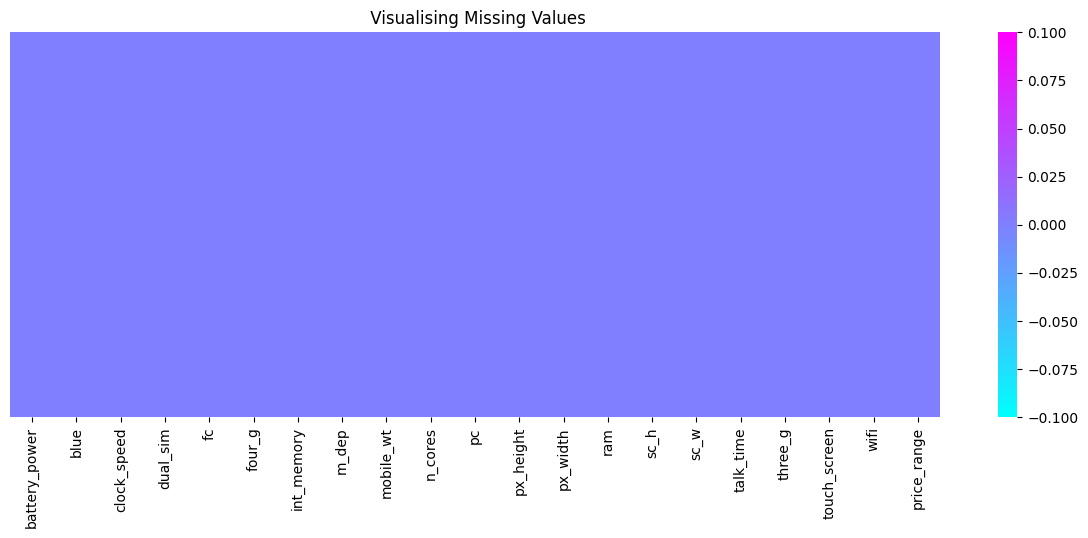

In [10]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(ds.isnull(),cmap='cool',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

Looking at the generated graph, it can be said that there is no null data in this data set. If there was even one null data in the given data set, we could easily see it on the heatmap given here.

In [11]:
duplicates = ds[ds.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0]) # finds and selects duplicate rows in the DataFrame

Number of duplicate rows: 0


Based on these output, we can say there is no null data and dublicate data for this data set. This is very good for us.

## Statistic Analysis

Now we are examining the dataset if it is balanced or unbalanced. 


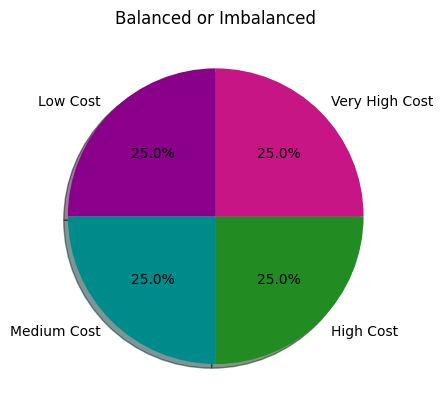

In [12]:
labels = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
values = ds['price_range'].value_counts().values
colors = ['darkmagenta','darkcyan','forestgreen', 'mediumvioletred']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Balanced or Imbalanced')
plt.show()


As can be seen from this pie chart, we created the data set we use to understand whether it is balanced or unbalanced. When we look at the output we have obtained, it is understood that this data set is in balance. This means that the model we will create will be able to adapt to the data very well. Thanks to the balance of the data set, our model will not be inadequate. This is good for us.

<p><p>

Thanks to describe function, we can analyze our data. We can calculate the basic statistical values of the data set. These calculations constitute the number of data, namely the count, the mean value of the data, the standard deviation of the data, the std value, the minimum values of the data, the min value, the 25%, 50% and 75% quantiles of the data, and finally the maximum value of the data, the max value.

In [13]:
ds.describe().T
# generates descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


We can see that sc_width and px_height has minimum value 0 which is not possible for any mobile. We need to handle this.


In [14]:
print(ds[ds['sc_w']==0].shape[0])
# Checking How many observations having screen width value as 0.

180


In [15]:
print(ds[ds['px_height']==0].shape[0])
# Checking How many observations having px_hieght value as 0.

2


In [16]:
ds=ds[ds['px_height']!=0]
# As there are only 2 observations having px_height=0. so we will drop it.

Now let's check the distribution of the price ranges given to us. Before we make predictions on our data, we will learn the previous distribution of price ranges.


In [17]:
x = ds.drop('price_range', axis = 1)
# rest of the data which are used as inputs as "x"

y = ds['price_range'] 
# target column as "y"


In [18]:
y.unique() #returns an array of the unique values in y


array([1, 2, 3, 0], dtype=int64)

## Data Visualization

### Price Range

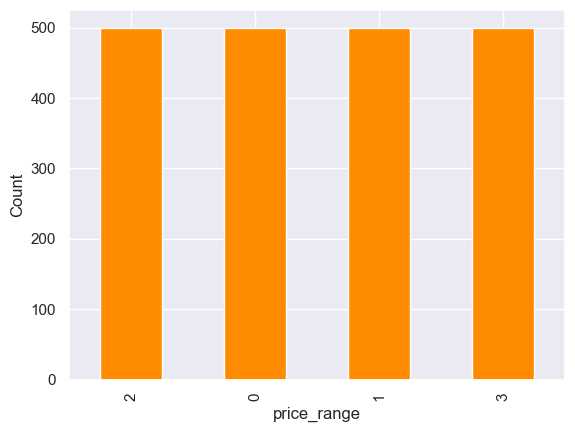

In [19]:
sns.set()
price_plot=ds['price_range'].value_counts().plot(kind='bar', color='darkorange')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

We can also see from this graph, price range in dataset is balanced

### Battery Power

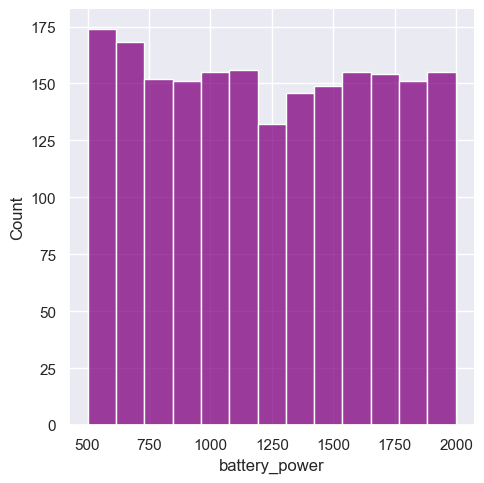

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(ds["battery_power"], color='purple')
plt.show()

this plot shows how the battery mAh is spread.

### Bluetooth

Text(0, 0.5, 'Number of phones')

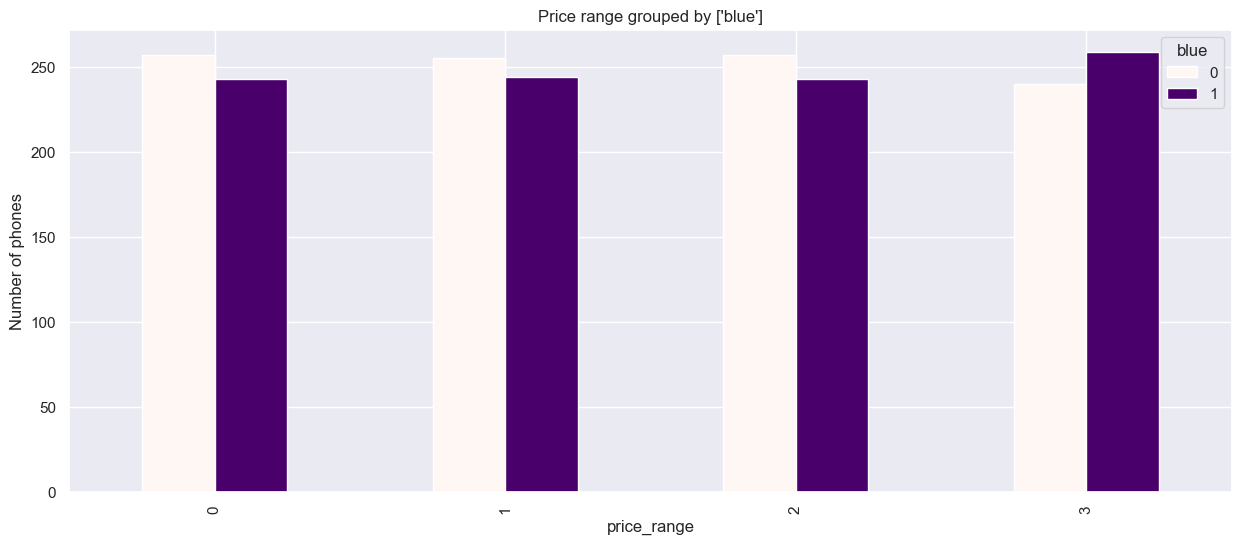

In [21]:
#analysis of data by visualization

item=['blue']
  
ds.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6), cmap='RdPu')
plt.title(f'Price range grouped by {item}')
plt.ylabel('Number of phones')


It shows the bluethooth features changing based on the price range.

### RAM

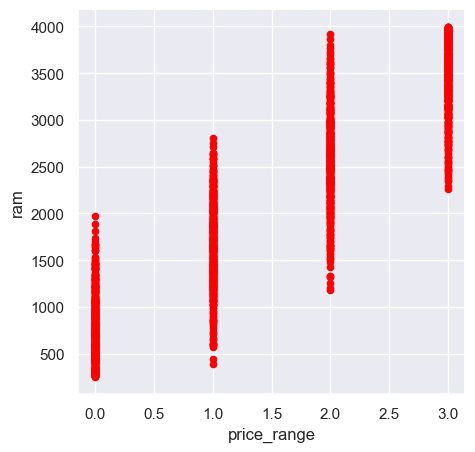

In [22]:
ds.plot(x='price_range',y='ram',kind='scatter', color='red')
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost

### pixel_width

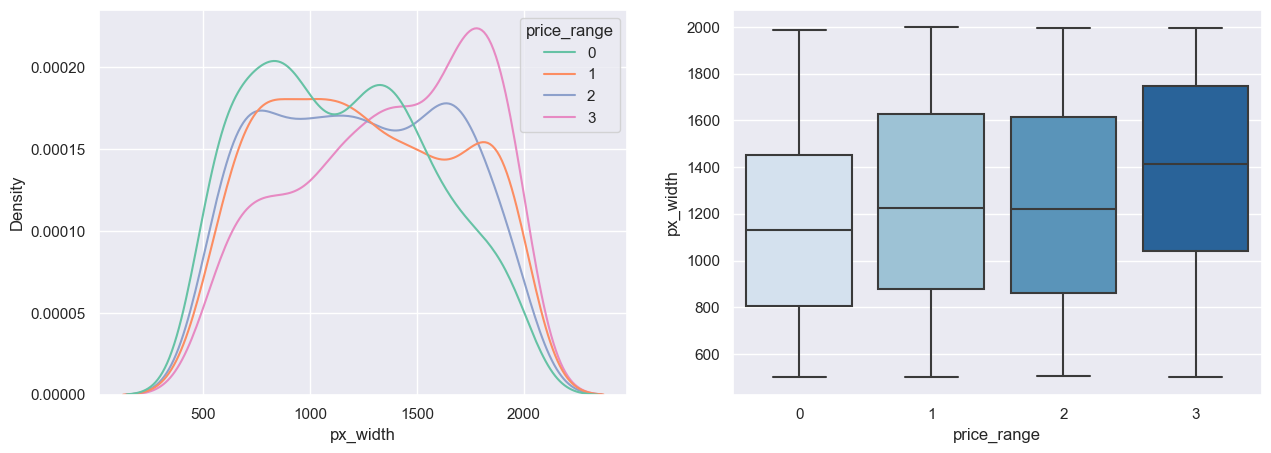

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='px_width', hue='price_range', ax=axs[0], palette='Set2')
sns.boxplot(data=ds, x='price_range', y='px_width', ax=axs[1], palette='Blues')
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width.
so we can say that it would be a driving factor in deciding price_range.


### Pixel_height

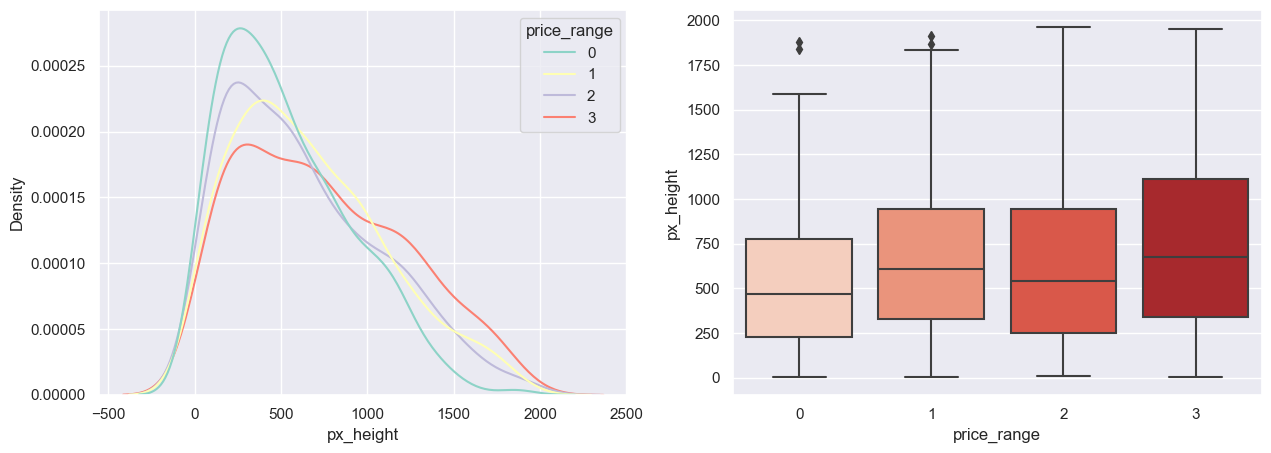

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='px_height', hue='price_range', ax=axs[0], palette='Set3')
sns.boxplot(data=ds, x='price_range', y='px_height', ax=axs[1], palette='Reds')
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

### FC  

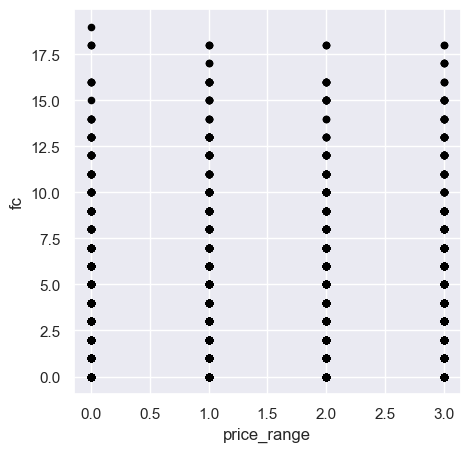

In [25]:
ds.plot(x='price_range',y='fc',kind='scatter', color='black')
plt.show()


This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

### PC 

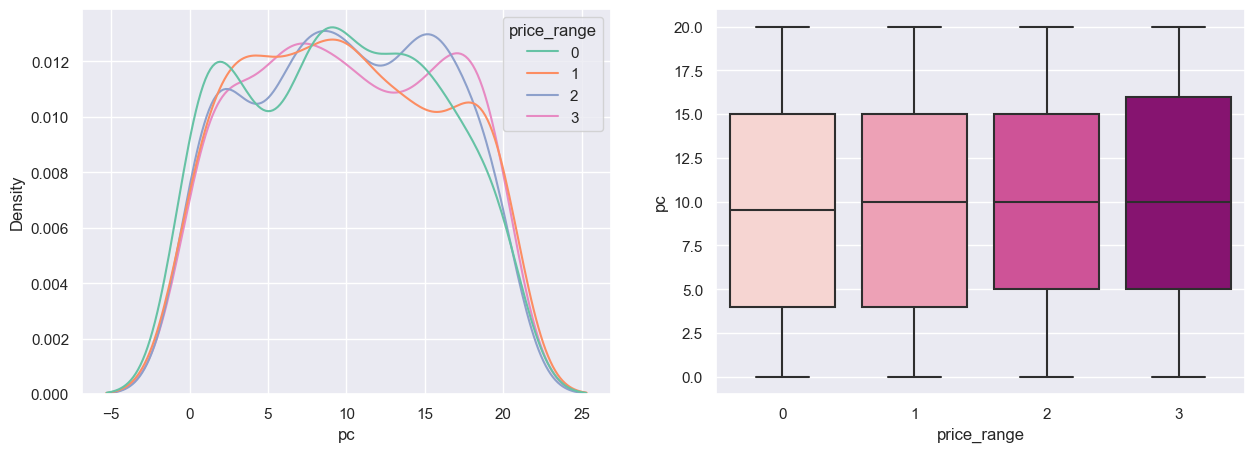

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='pc', hue='price_range', ax=axs[0], palette ="Set2")
sns.boxplot(data=ds, x='price_range', y='pc', ax=axs[1], palette="RdPu")
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.


###  Mobile Weight

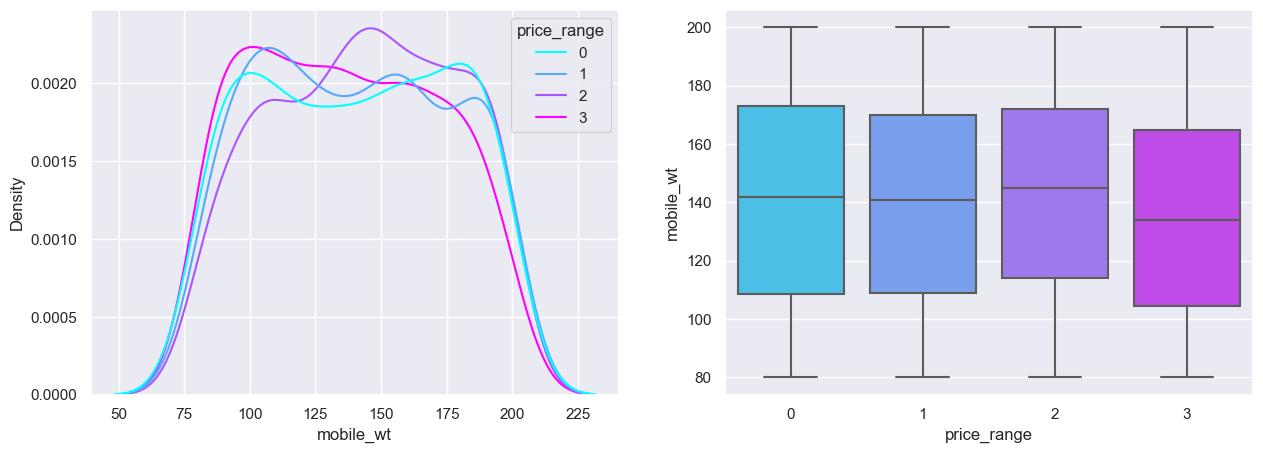

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='mobile_wt', hue='price_range', ax=axs[0], palette= 'cool')
sns.boxplot(data=ds, x='price_range', y='mobile_wt', ax=axs[1], palette = 'cool')
plt.show()


Based on these graphs we can say costly phones are lighter. Cheap phones is heavy, costly phones is lighter.

### Screen Size

In [28]:
# Defining new variable sc_size

ds['sc_size'] = np.sqrt((ds['sc_h']**2) + (ds['sc_w']**2))
ds['sc_size'] = round(ds['sc_size']/2.54, 2)

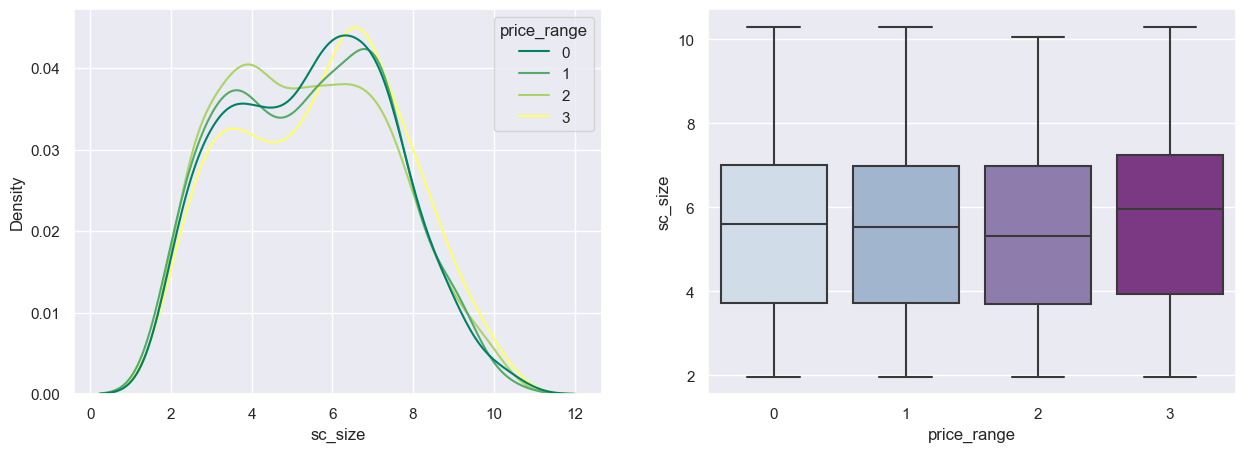

In [29]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='sc_size', hue='price_range', ax=axs[0], palette= 'summer')
sns.boxplot(data=ds, x='price_range', y='sc_size', ax=axs[1], palette = 'BuPu')
plt.show() 



Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

### Four_g and Three_g

In [30]:
binary_features = [ 'four_g', 'three_g']


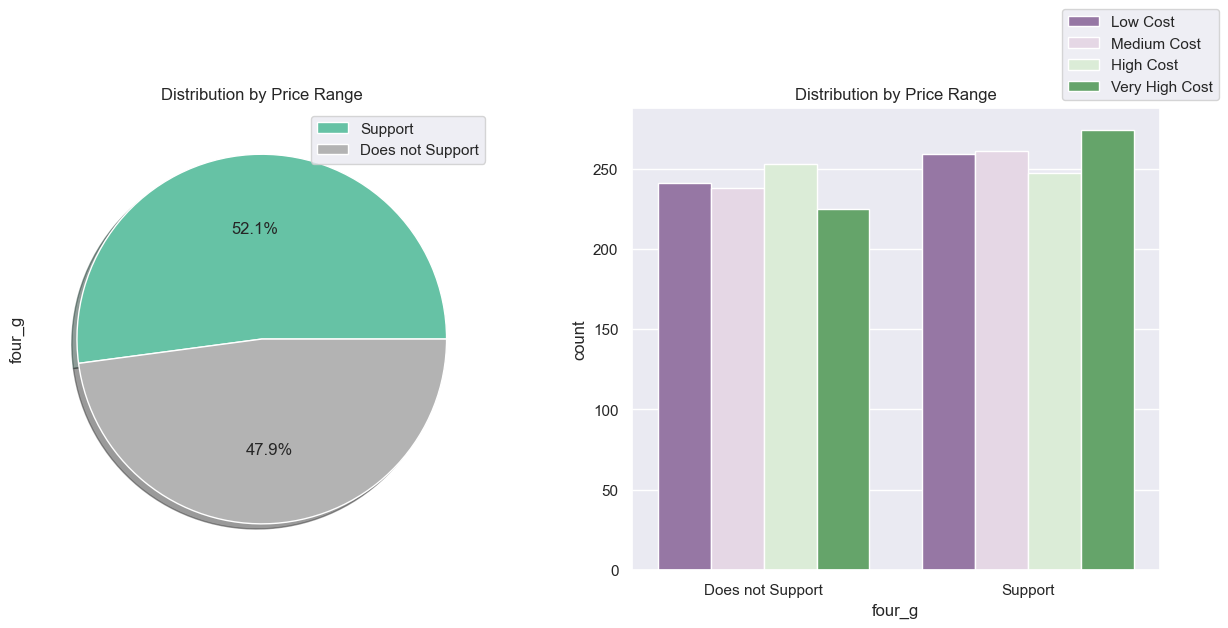

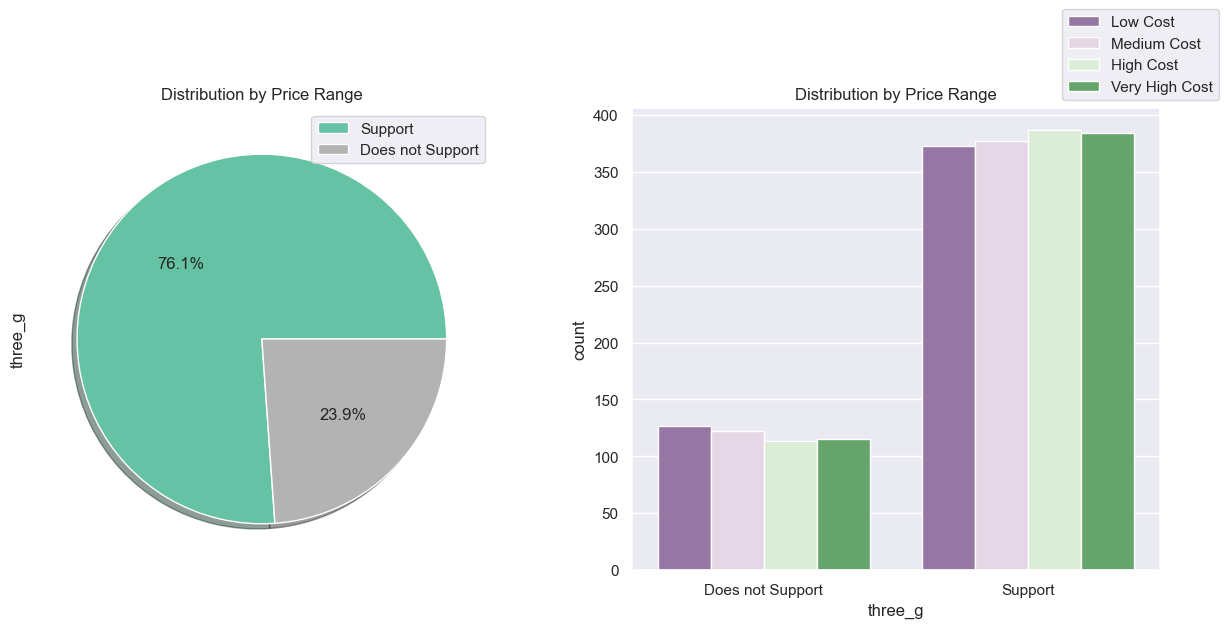

In [31]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  ds[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None, cmap='Set2')
  ax1.set_title('Distribution by Price Range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = ds, ax = ax2, palette='PRGn')
  ax2.set_title('Distribution by Price Range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'], bbox_to_anchor= (0.8, 1))
  ax2.set_xticklabels(['Does not Support', 'Support'])

In these pie charts, it shows how many phone support four g or three g and how change the price range based on this.

### Clock_speed

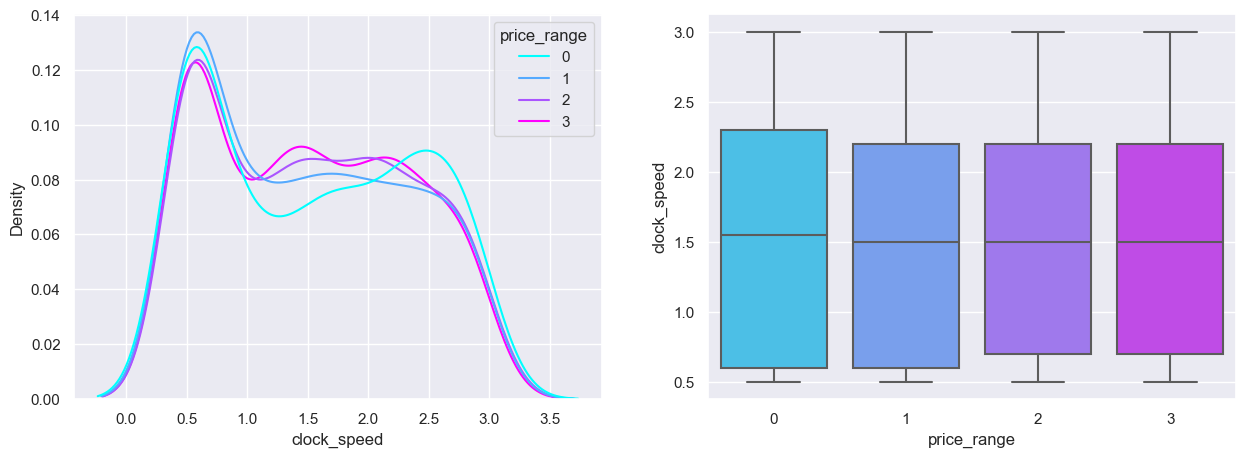

In [32]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='clock_speed', hue='price_range', ax=axs[0], palette= 'cool')
sns.boxplot(data=ds, x='price_range', y='clock_speed', ax=axs[1], palette = 'cool')
plt.show()


As can be seen from these graphs, phones with clock speed values between 0 and 1 are mostly between 0 and 1 price ranges.

In the clock speed category, the highest values are between 0 and 1.

### Dual_sim

Text(0, 0.5, 'Number of phones')

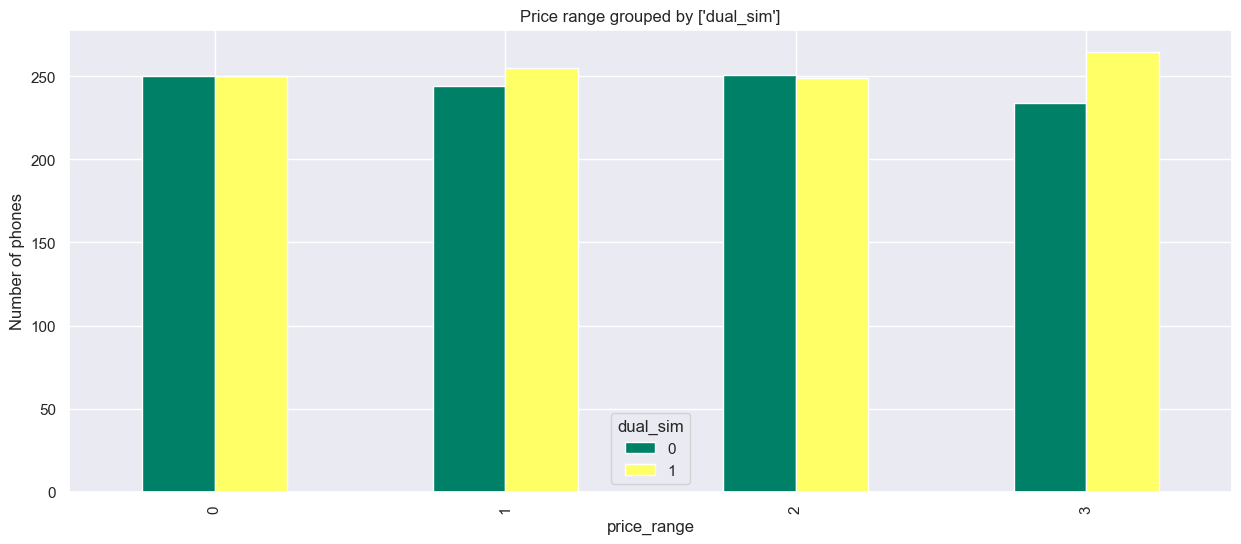

In [33]:
item=['dual_sim']

ds.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6), cmap='summer')
plt.title(f'Price range grouped by {item}')
plt.ylabel('Number of phones')

It can be seen from the graph that the dual sim and non-dual sim cases are actually almost equal. But still, of course, the price range value where most dual sims are found is "very high" which is 3.

### Int_memory

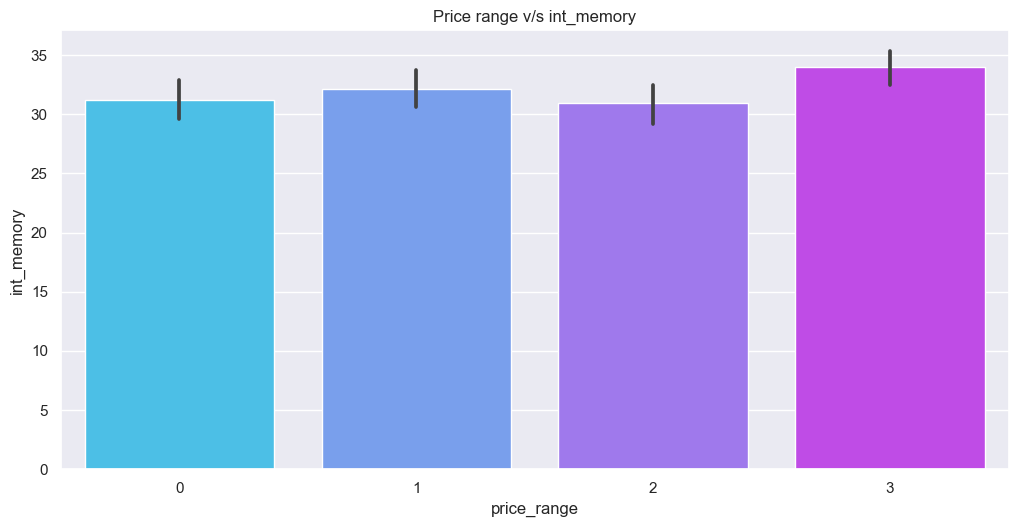

In [34]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['int_memory']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=ds['price_range'],y=ds[var], palette='cool')
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()



It can be understood from this graph that the highest range of int_memory feature is "Very high", that is 3. Also, int_memory feature will not have much importance in determining the phone price range.

### M_dep 

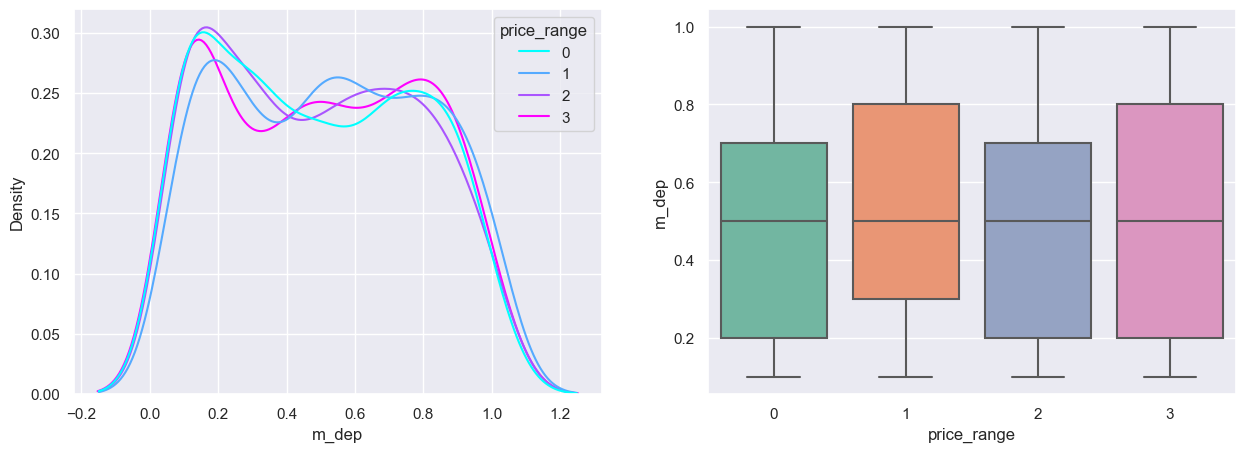

In [35]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='m_dep', hue='price_range', ax=axs[0], palette= 'cool')
sns.boxplot(data=ds, x='price_range', y='m_dep', ax=axs[1], palette = 'Set2')
plt.show()


Mobile depth is showing a little variation along the target categories, which is a good sign for prediction.

### N_cores

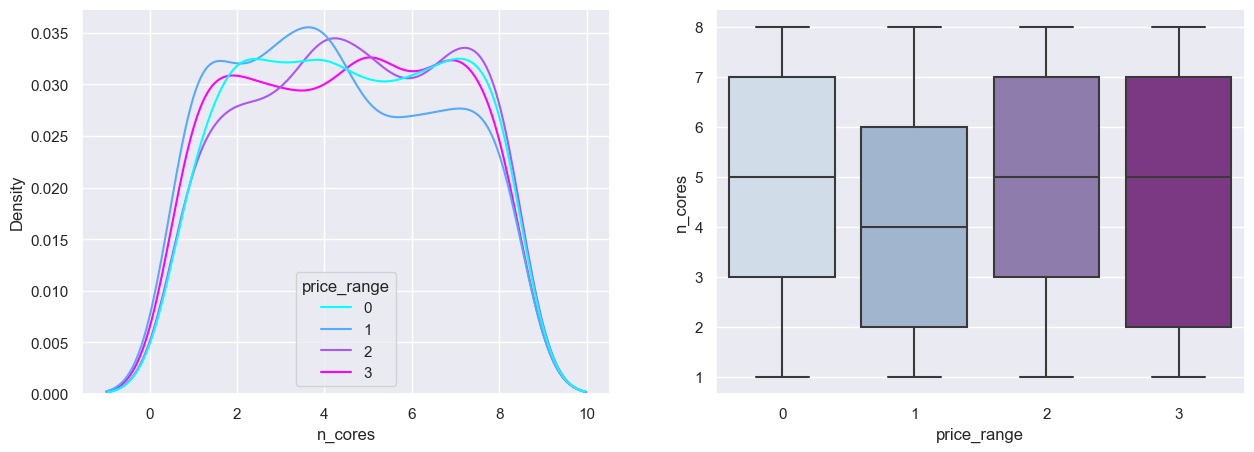

In [36]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='n_cores', hue='price_range', ax=axs[0], palette= 'cool')
sns.boxplot(data=ds, x='price_range', y='n_cores', ax=axs[1], palette = 'BuPu')
plt.show()

From this chart, we can see that the lowest n_cores data is between 0 and 4. Values that are high in the N_cores data are in the price range 0, that is, in the low-value range.

### Talk_time

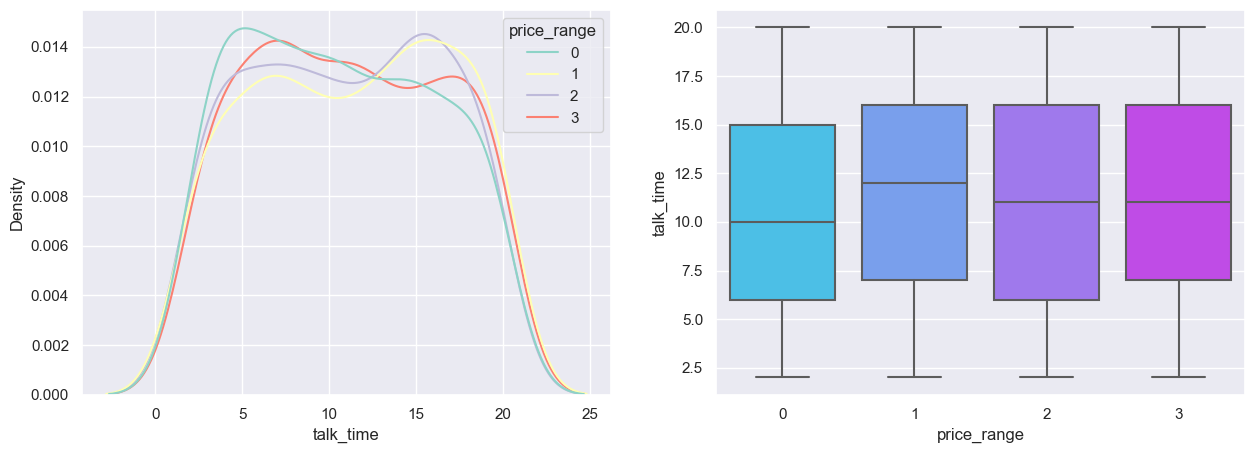

In [37]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=ds, x='talk_time', hue='price_range', ax=axs[0], palette= 'Set3')
sns.boxplot(data=ds, x='price_range', y='talk_time', ax=axs[1], palette = 'cool')
plt.show()


The lowest talk_time values are in the 0 price range value range.

### Touch_screen

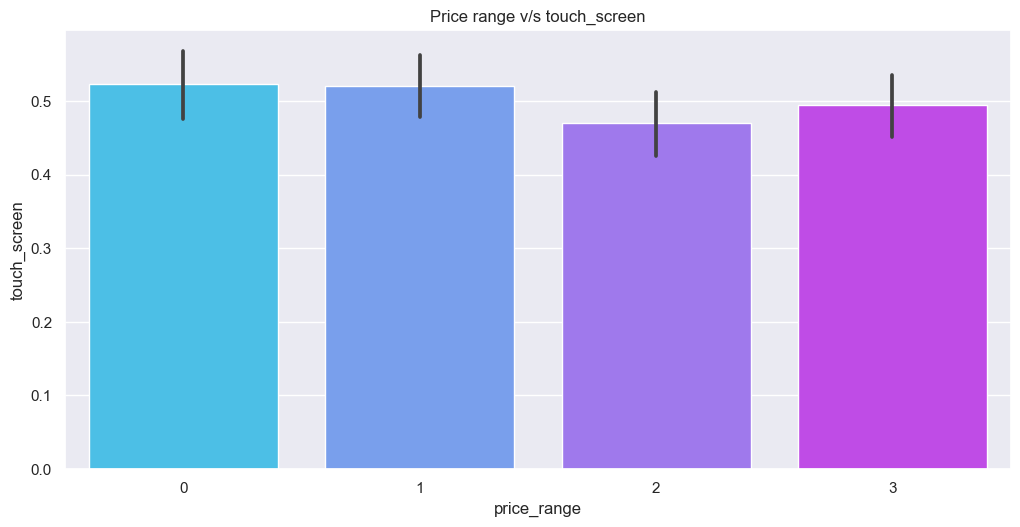

In [38]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['touch_screen']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=ds['price_range'],y=ds[var], palette='cool')
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()


It shows the touch screen features changing based on the price range.

### Wi-Fi

Text(0, 0.5, 'Number of phones')

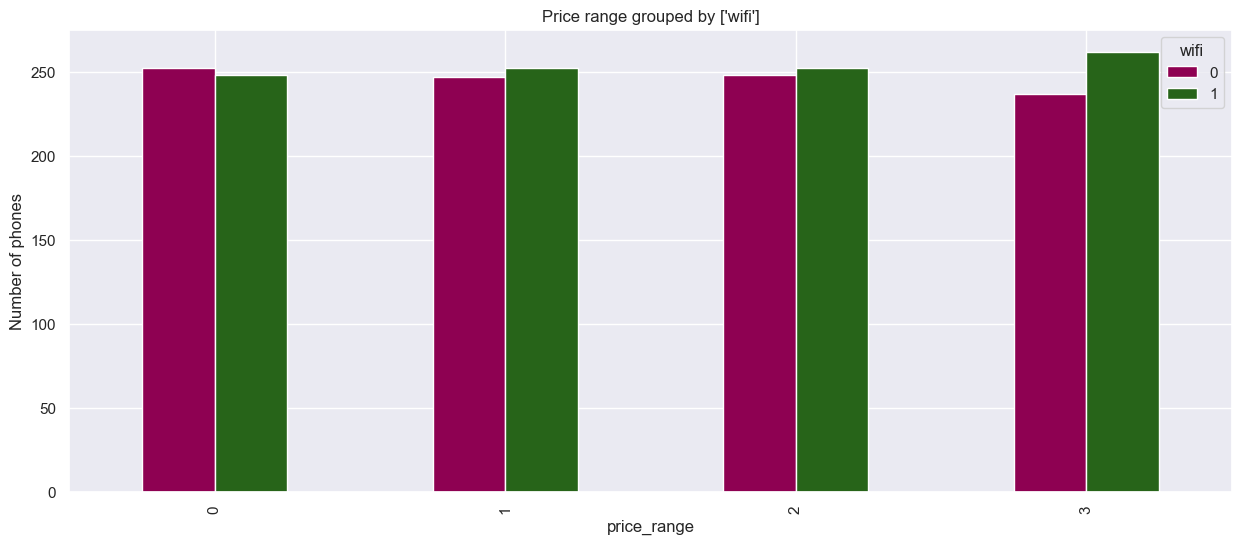

In [39]:
item=['wifi']

ds.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6), cmap='PiYG')
plt.title(f'Price range grouped by {item}')
plt.ylabel('Number of phones')


This graph shows the how many phone has wifi or not. In price range 3, the number of phones with "have wifi" is greater than the number of phones with "no wifi".

In [40]:
y = ds['price_range']
x = ds.drop('price_range', axis = 1)

In [41]:
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study. 

array([1, 2, 3, 0], dtype=int64)

In [42]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)
#splits the data into training and validation sets with a 80/20 ratio, 
#using a fixed random seed and stratifying by the target variable.

In previous code line, it gives the 20% for test, 80% for training set.
And it used stratification. So, it stratifies based on the target class. 

In [43]:
# shapes of the training and validation sets to check whether they match the expected sizes.
print(x_train.shape)
print(x_valid.shape)

(1598, 21)
(400, 21)


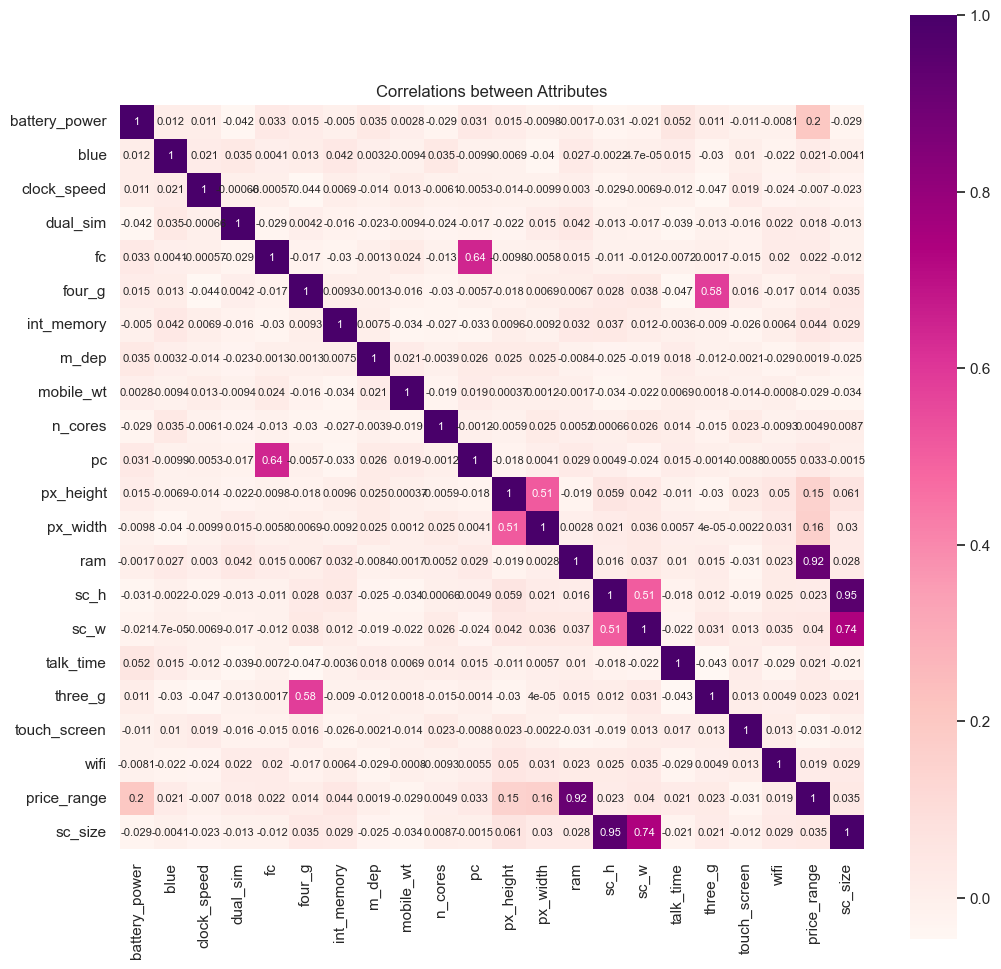

In [44]:
# Before going through machine learning applications, let's see the correlation btw features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(ds.corr (), square = True, cbar = True, annot = True, cmap="RdPu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()


RAM and price_range exhibit a strong positive correlation, indicating that RAM will have a significant impact on determining the price range.

There is a certain degree of collinearity present in the feature pairs ('pc', 'fc') and ('px_width', 'px_height'). These correlations are reasonable as it is likely that if the front camera of a phone is of high quality, the back camera will also be of good quality.


Furthermore, when the pixel height (px_height) increases, the pixel width (px_width) also tends to increase, resulting in an overall increase in screen resolution. Consequently, it is possible to consolidate these two features into a single feature. Despite exhibiting collinearity, it is important to note that Front Camera megapixels and Primary camera megapixels represent distinct entities, so we will retain them in their original form.

The presence of both 3G and 4G technologies shows a moderate correlation.

Most of the variables have a weak correlation with the price range.

Our dataset does not contain highly correlated inputs, indicating the absence of multicollinearity issues.

### Univariate Analysis of Categorical columns

These are bluethooth, four g, three g, wifi, touch screen, dual sim. These are just yes or no categorical attributes.

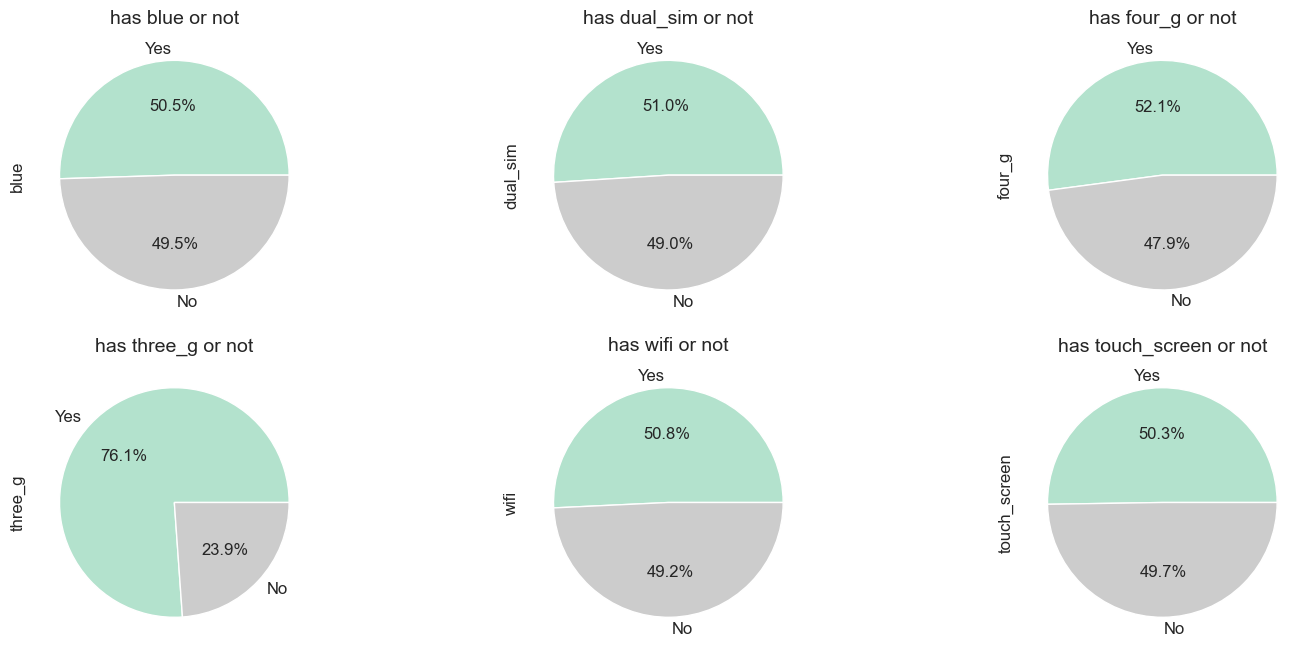

In [45]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  ds[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels, cmap='Pastel2')
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1
  

These 6 properties do not carry any numeric value. These 6 values only show whether this feature is available on a phone.

#### Checking which numerical feature is driving the price range most

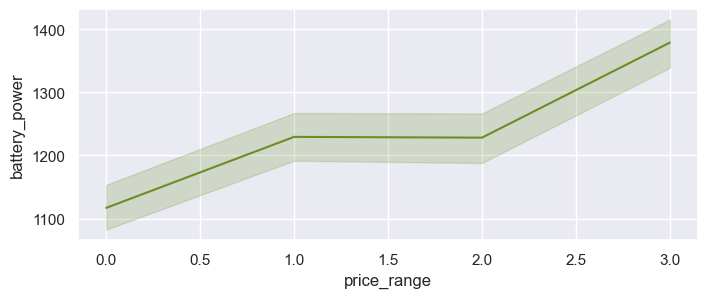

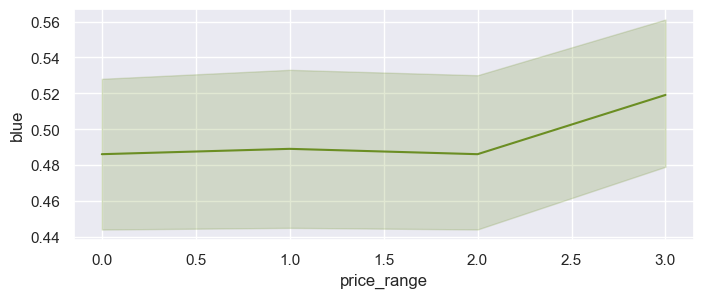

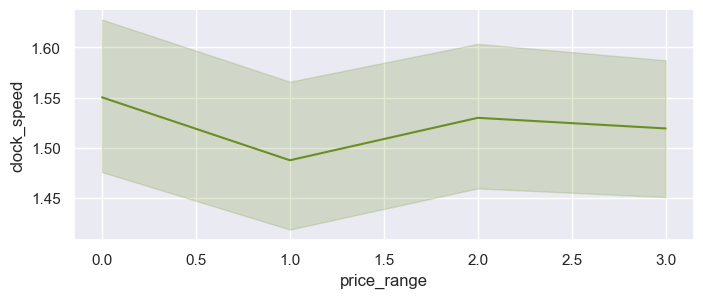

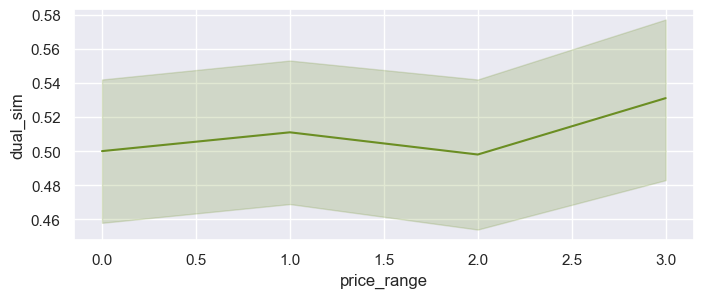

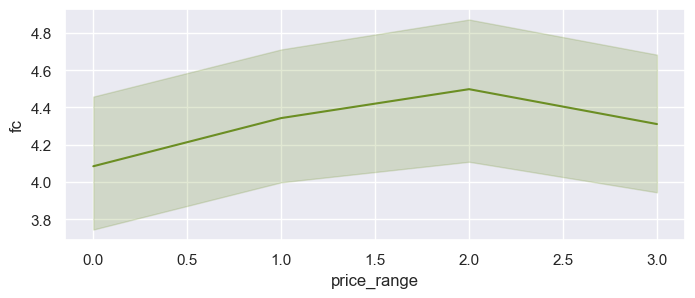

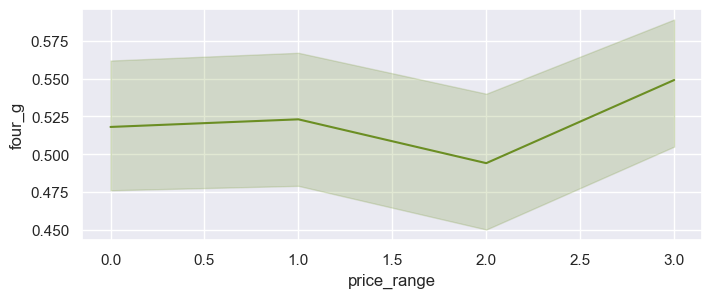

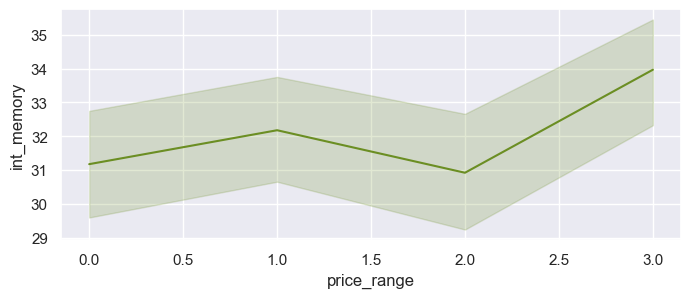

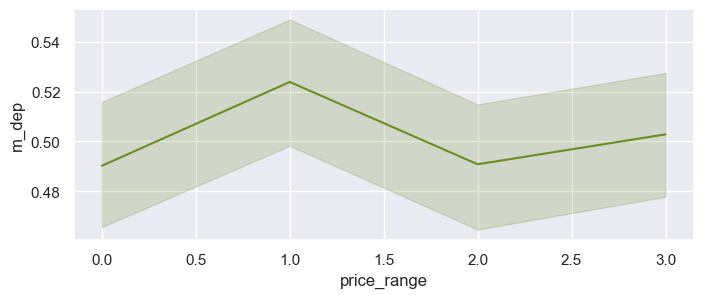

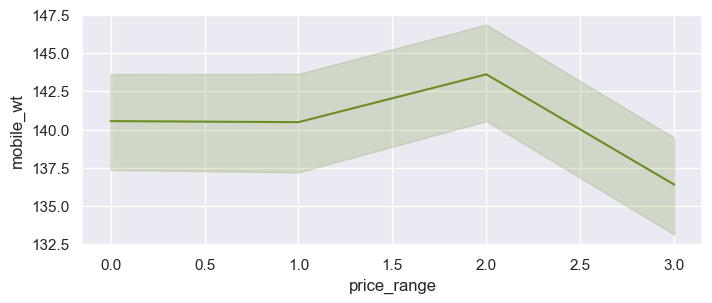

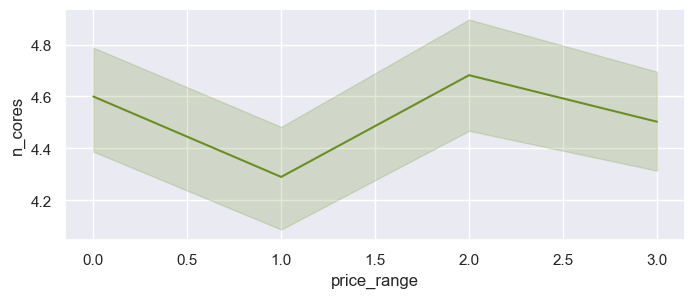

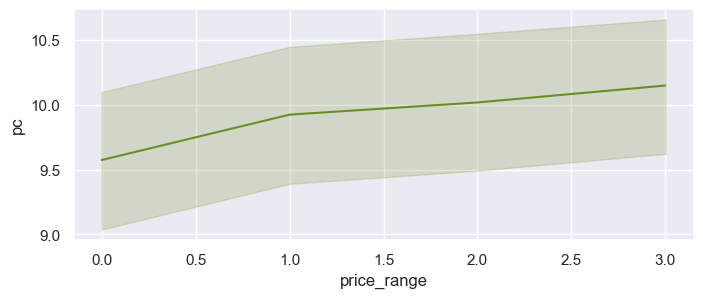

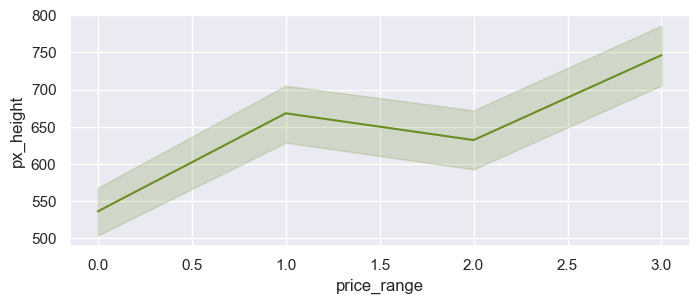

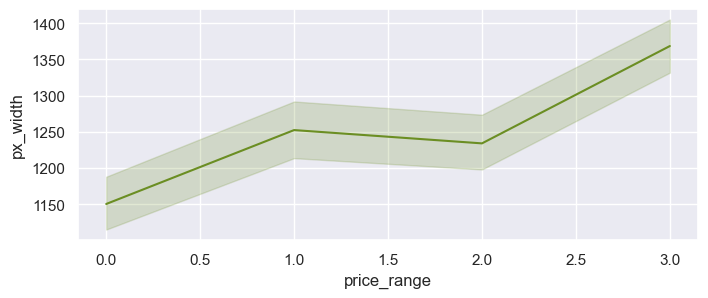

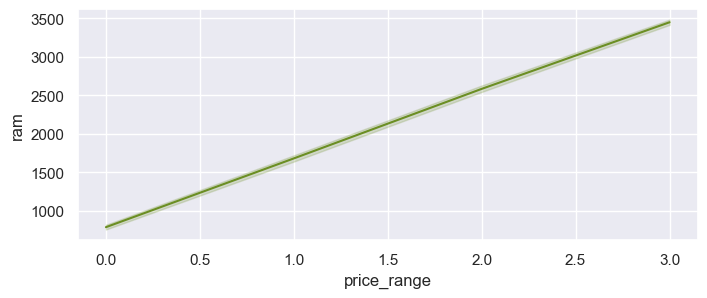

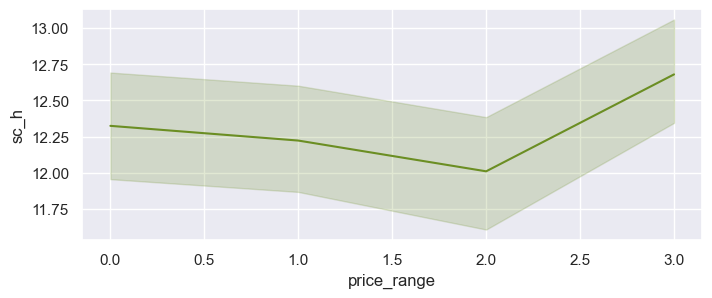

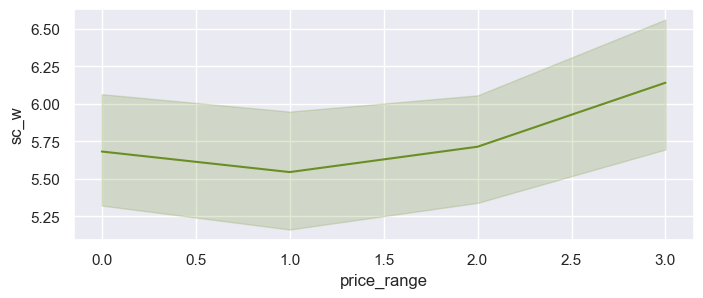

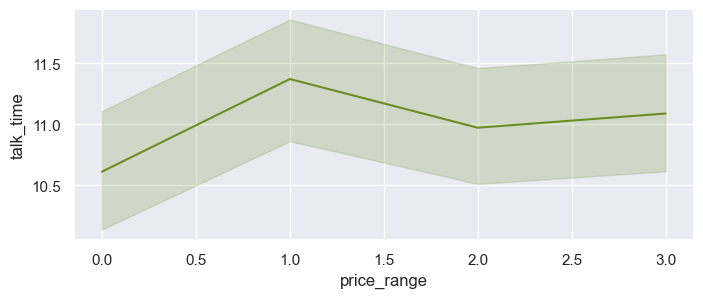

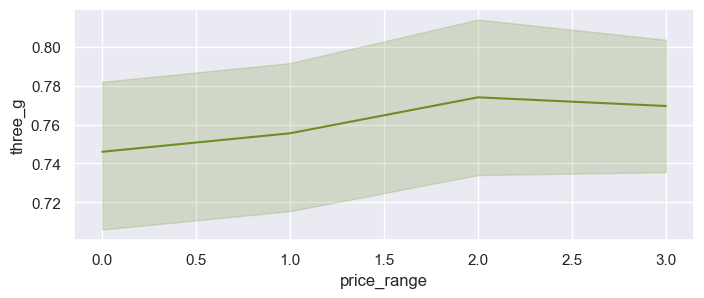

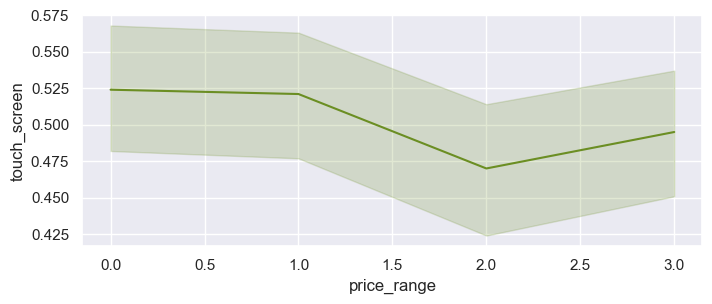

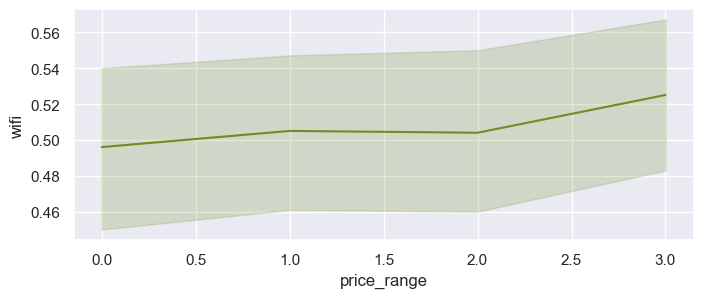

In [46]:
index= ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

# plotting boXplot and distribution
counter=1
for var in index:
    plt.figure(figsize=(8,3))
    
    sns.lineplot(x=ds['price_range'],y=ds[var], color='olivedrab')


Observations
For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.

Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.

Mobiles having max screen height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases.

RAM has clear relationship with price range we saw that in correlation matrix also.

## Outlier Treatment and Data Normalization

Now we will check the distribution of numerical columns and outliers.

So, we know we have 14 numberical columns.

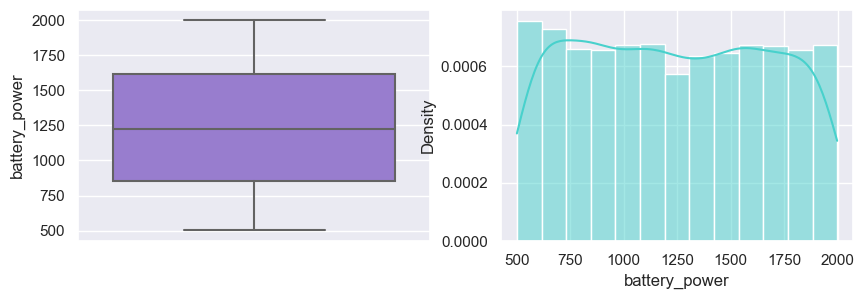

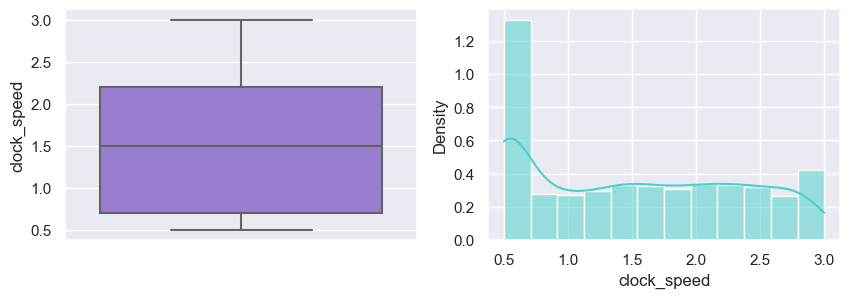

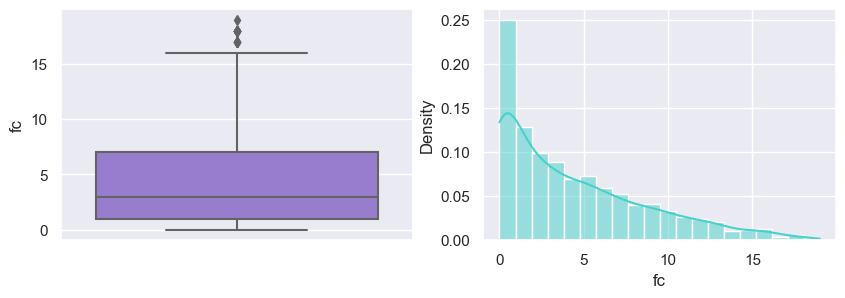

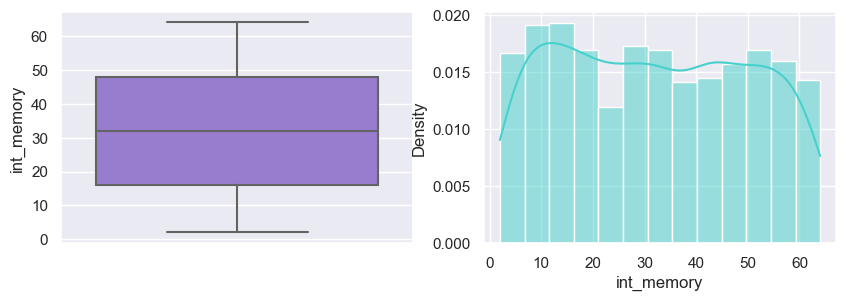

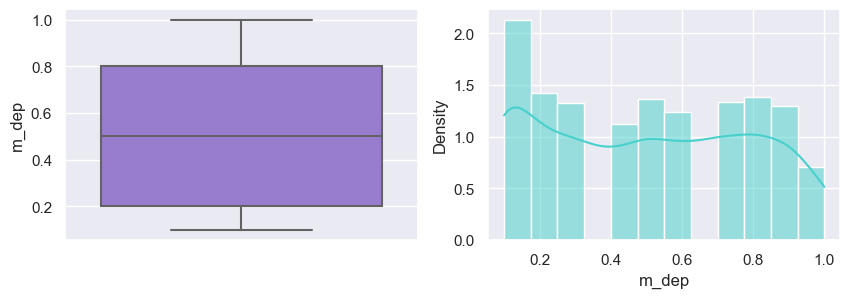

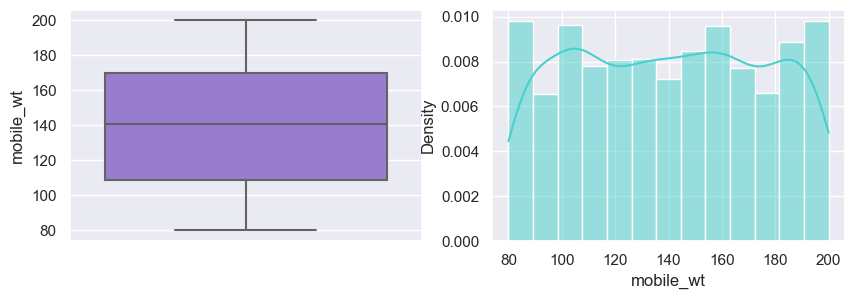

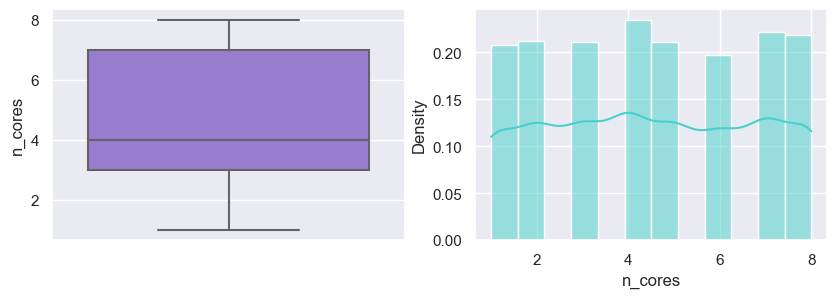

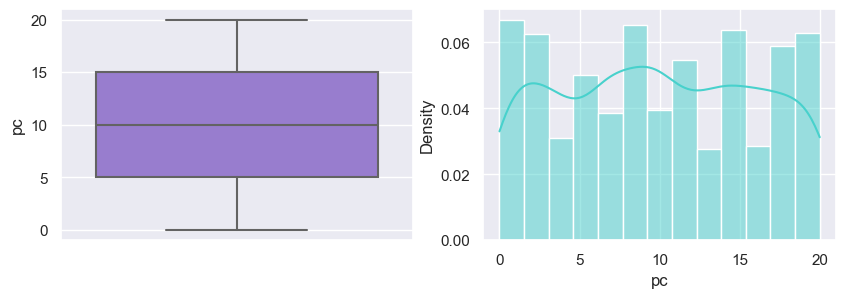

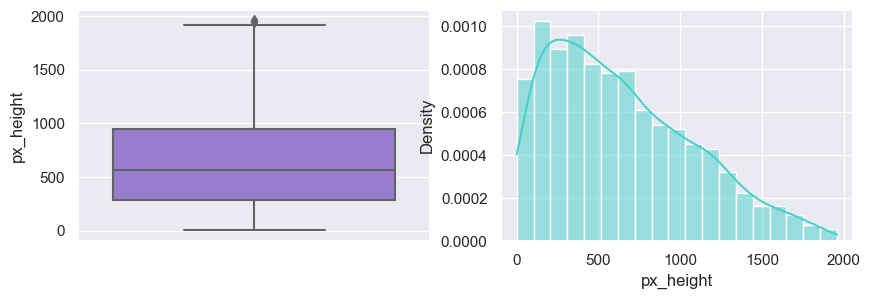

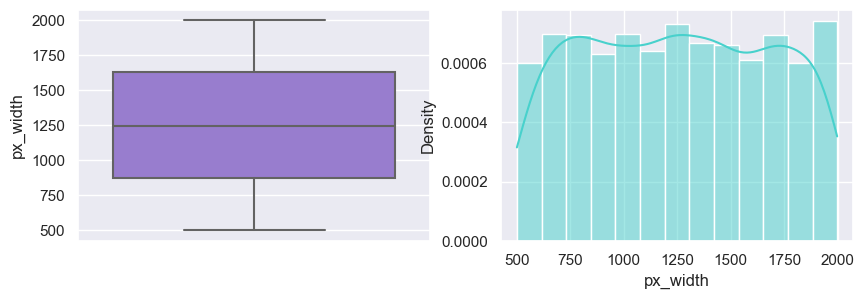

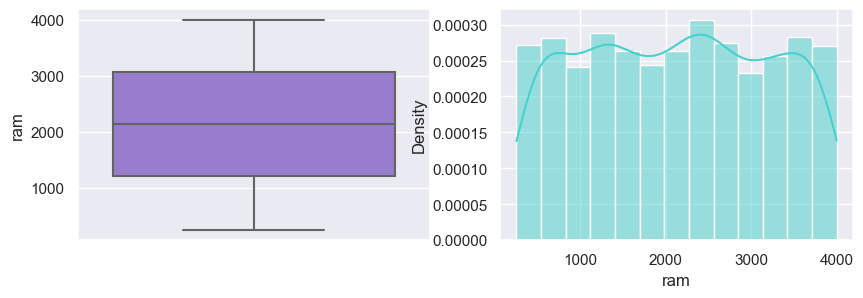

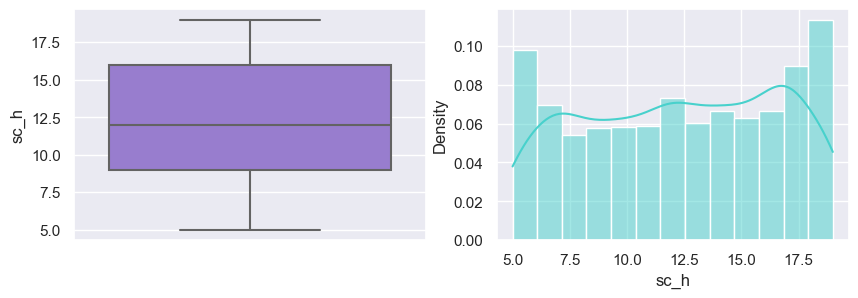

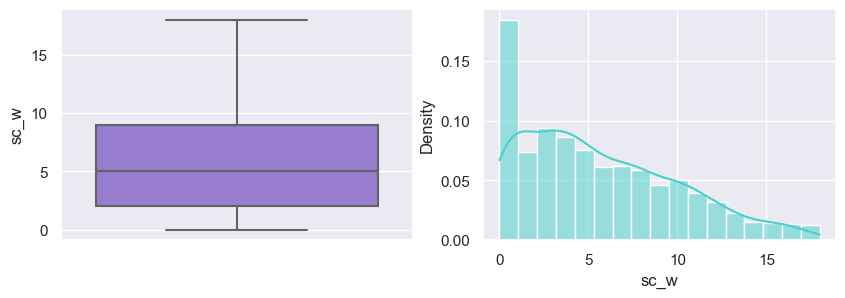

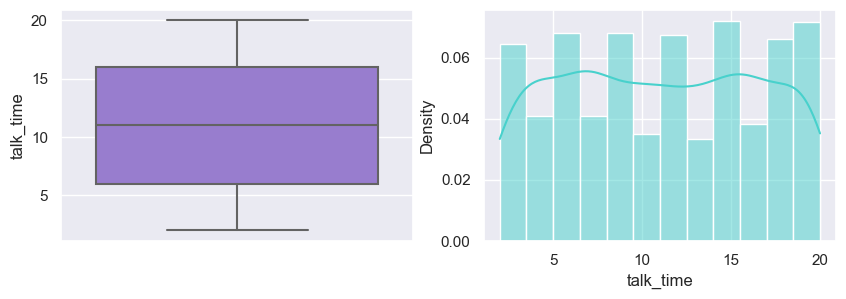

In [47]:
numerical_columns=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for var in numerical_columns:
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=ds[var], color= 'mediumpurple')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.histplot(ds[var], color ='mediumturquoise', kde=True, stat="density")
    
    fig.set_xlabel(var)

    plt.show()

After these plots, we can say the data is well distributed.

And it seems fc and px_height attributes have attributes.

In [48]:
Q1 = ds["fc"].quantile(0.25)
Q3 = ds['fc'].quantile(0.75)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.

ds = ds[(ds['fc'] <= Q3)]

In [49]:
Q1 = ds["px_height"].quantile(0.25)
Q3 = ds['px_height'].quantile(0.75)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.

ds = ds[(ds['px_height'] <= Q3)]

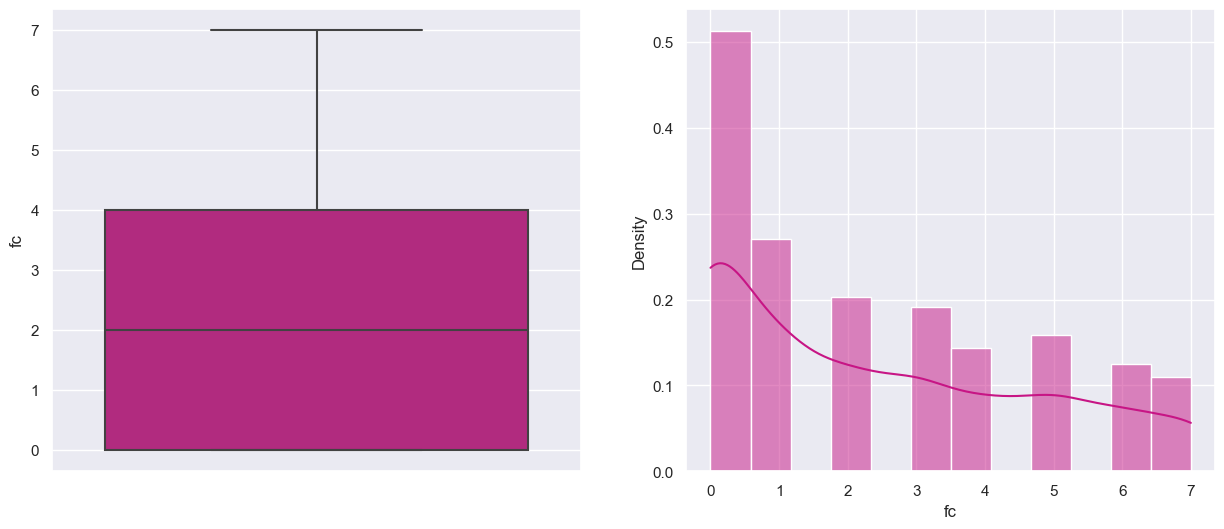

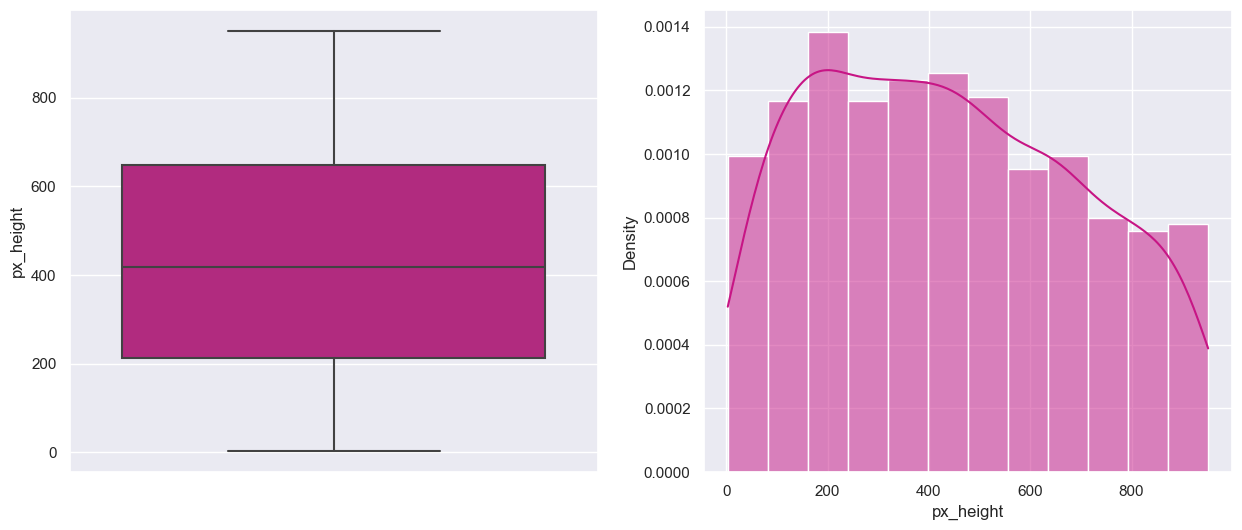

In [50]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=ds[var],color='mediumvioletred')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.histplot(ds[var],color='mediumvioletred', kde=True, stat="density")
    
    fig.set_xlabel(var)

    plt.show()

After all of them, we can clearly see there is no  outliers are present in boxplot. 

## Feature Selection

In [51]:
ds.head().T

,0,1,6,7,8
battery_power,842.00,1021.0,1821.00,1954.00,1445.0
blue,0.00,1.0,0.00,0.00,1.0
clock_speed,2.20,0.5,1.70,0.50,0.5
dual_sim,0.00,1.0,0.00,1.00,0.0
fc,1.00,0.0,4.00,0.00,0.0
four_g,0.00,1.0,1.00,0.00,0.0
int_memory,7.00,53.0,10.00,24.00,53.0
m_dep,0.60,0.7,0.80,0.80,0.7
mobile_wt,188.00,136.0,139.00,187.00,174.0
n_cores,2.00,3.0,8.00,4.00,7.0


In [52]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=ds.drop('price_range',axis=1)
y=ds["price_range"]

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
#We conn select the top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [55]:
# creating score's and column's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)  

In [56]:
# concatenation above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [57]:
# Check dataframe
featureScores

,Specs,Score
0,battery_power,8117.217663
1,blue,0.519049
2,clock_speed,1.239870
3,dual_sim,4.040355
4,fc,6.897665
5,four_g,3.783847
6,int_memory,40.653169
7,m_dep,0.278244
8,mobile_wt,25.118869
9,n_cores,2.267322


In [58]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  570164.115655
0   battery_power    8117.217663
12       px_width    2291.203628
11      px_height    1933.206157
6      int_memory      40.653169
8       mobile_wt      25.118869
4              fc       6.897665
16      talk_time       5.209474
3        dual_sim       4.040355
5          four_g       3.783847
10             pc       3.394979
14           sc_h       3.005260


In [59]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=ds[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=ds['price_range']

## Correlation Analysis 

<Axes: >

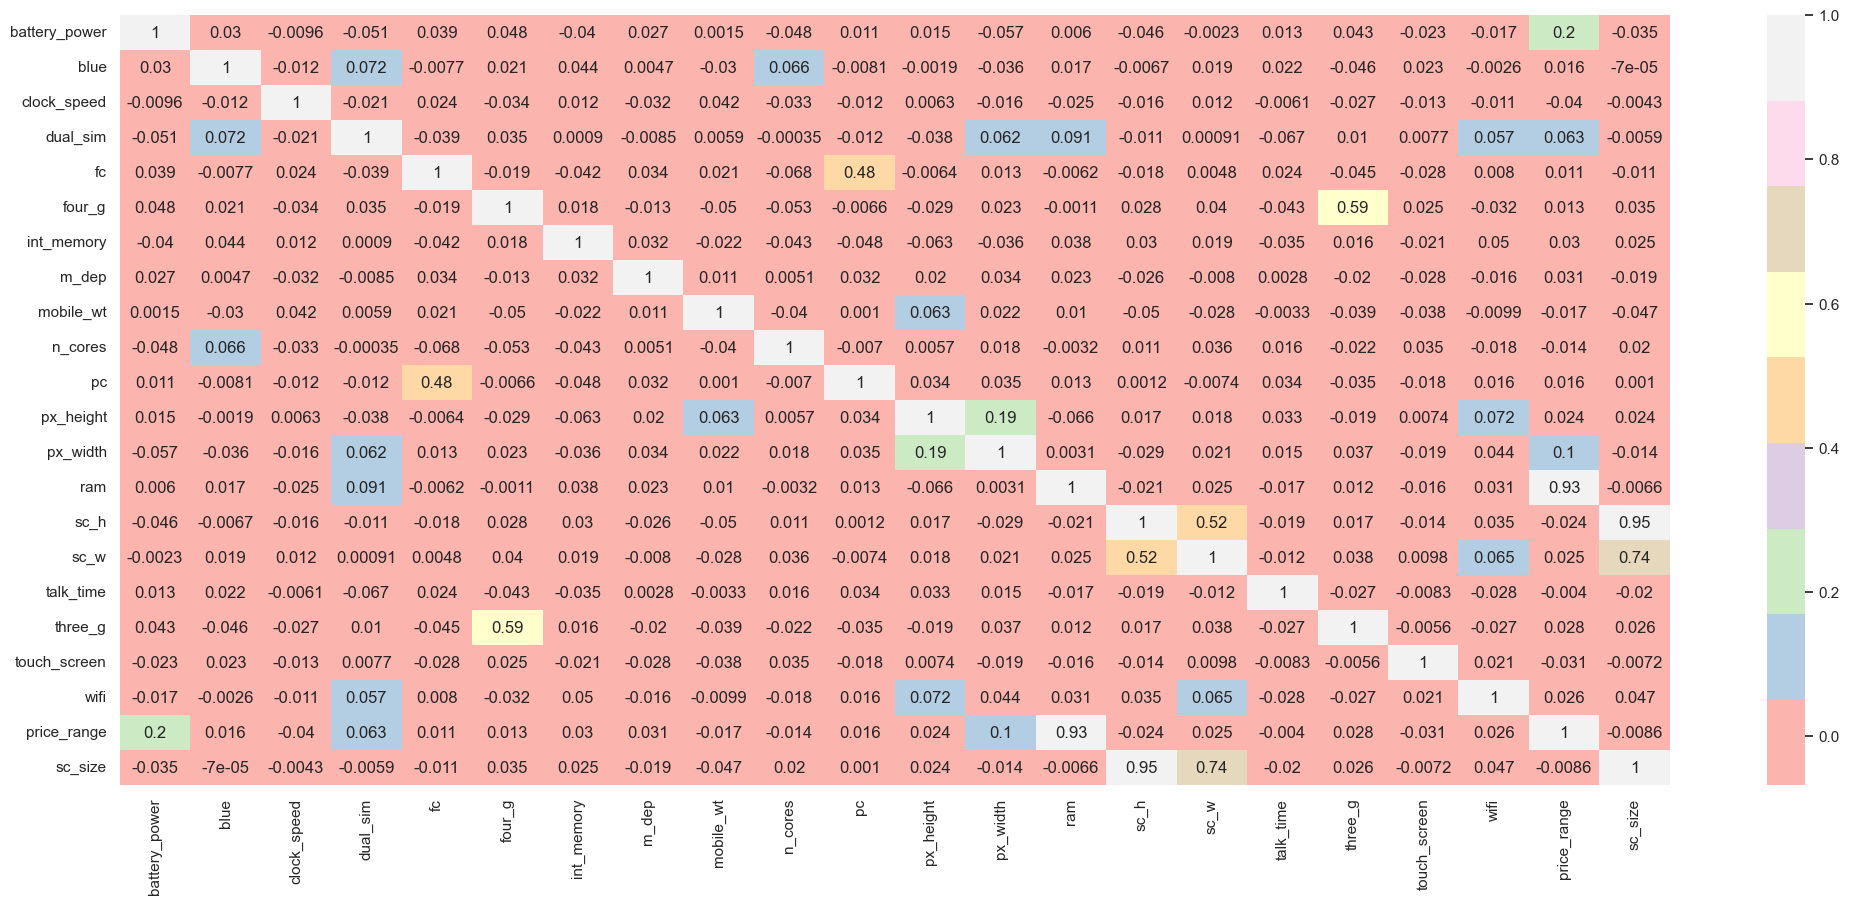

In [60]:
corr= ds.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Pastel1)

The presence of both 3G and 4G technologies shows a moderate correlation.
Our dataset does not contain highly correlated entries, indicating the absence of multicollinearity issues.
Most of the variables have a weak correlation with the price range.

# Model Selection and Validation

Algorithms used for this project listed below:

    1- Logistic Regression
    2- Decision Tree
    3- K-nearest Neighbour Classifier
    4- Random Forest
    

## Logisitic Regression

Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [61]:
X = ds.drop(['price_range'], axis = 1) # Defining X 
y = ds['price_range'] # Defining y

In [62]:
X.shape

(1171, 21)

In [63]:
y.shape

(1171,)

In [64]:
# Scaling values of X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [66]:
X_train.shape

(936, 21)

In [67]:
y_train.shape

(936,)

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train, y_train)

LogisticRegression()

In [70]:
print('Model Score', lr.score(X_train,y_train))

Model Score 0.9145299145299145


In [71]:
# Make Prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

lr_acc = accuracy_score(y_test,y_pred_test)
print('Accuracy by Logistic Regression : ',lr_acc) ## calculating accurracy for logistic Regression

Accuracy by Logistic Regression :  0.8638297872340426


In [73]:
from sklearn.metrics import classification_report

print('Classification Report for Logistic Regression In Mobile Phone Price Range Prediction \n\n')

print(classification_report(y_pred_test, y_test))

Classification Report for Logistic Regression In Mobile Phone Price Range Prediction 


              precision    recall  f1-score   support

           0       0.97      0.89      0.93        80
           1       0.76      0.82      0.79        55
           2       0.75      0.90      0.82        52
           3       1.00      0.83      0.91        48

    accuracy                           0.86       235
   macro avg       0.87      0.86      0.86       235
weighted avg       0.88      0.86      0.87       235



You can see our accuracy value is matcing with the accuracy value in Classification Report

[[71  2  0  0]
 [ 9 45  5  0]
 [ 0  8 47  8]
 [ 0  0  0 40]]


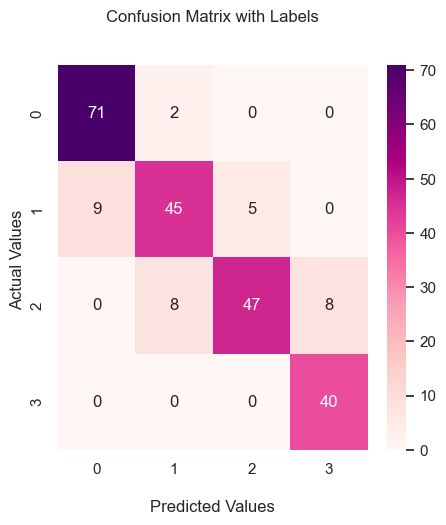

In [74]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='RdPu')

ax.set_title('Confusion Matrix with Labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Tree

In [75]:
# Applying Decision Tree

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
# Prediction

y_pred_test_dt = dtc.predict(X_test)
y_pred_train_dt = dtc.predict(X_train)

In [77]:
dt_acc= accuracy_score(y_test, y_pred_test_dt)
print('Accuracy by Decision Tree : ',dt_acc) ## calculating accurracy for decision tree

Accuracy by Decision Tree :  0.851063829787234


In [78]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test_dt, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        70
           1       0.86      0.80      0.83        64
           2       0.78      0.83      0.80        59
           3       0.85      0.81      0.83        42

    accuracy                           0.85       235
   macro avg       0.85      0.84      0.85       235
weighted avg       0.85      0.85      0.85       235



[[71  2  0  0]
 [ 9 45  5  0]
 [ 0  8 47  8]
 [ 0  0  0 40]]


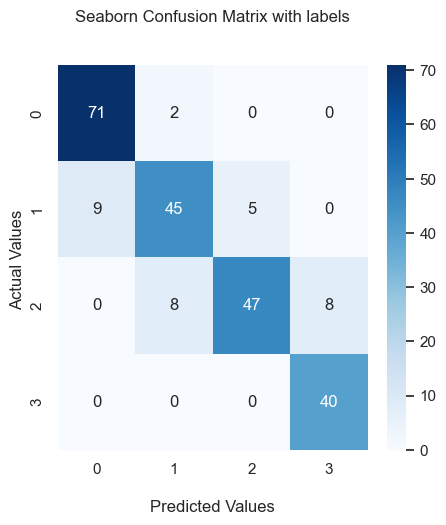

In [79]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

## KNN Classification

In [80]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
y_pred_knn = model_knn.predict(X_test)  

In [82]:
print(metrics.confusion_matrix(y_test, y_pred_knn)) 

[[47 15 10  1]
 [23 17 12  7]
 [17 16 14 16]
 [ 6 15  9 10]]


In [83]:
knn_acc= accuracy_score(y_test, y_pred_knn)
print('Accuracy by KNN: ',knn_acc) ## calculating accurracy for knn

Accuracy by KNN:  0.37446808510638296


Until here we do not know the optimu "k". 
Now we will find the optimum "k" value.

In [84]:
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model_k = GridSearchCV(knn, parameters, cv=5)
model_k.fit(X_train, y_train)
model_k.best_params_

{'n_neighbors': 29}

After finding optimum k number, we run our model again with k=29.

In [85]:
model_knn = KNeighborsClassifier(n_neighbors=29)  
model_knn.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=29)

In [86]:
y_pred_knn = model_knn.predict(X_test) 

In [87]:
print(metrics.confusion_matrix(y_test, y_pred_knn)) 

[[51 19  3  0]
 [32 16  9  2]
 [10 16 22 15]
 [ 0  5 11 24]]


In [88]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy by KNN : ',acc_knn) ## calculating accurracy for knn

Accuracy by KNN :  0.4808510638297872


## Random Forest

Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [89]:
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [90]:
y_pred = clsr.predict(X_test)
rf_acc= accuracy_score(y_test, y_pred)
print('Accuracy by Random Forest : ', rf_acc ) ## calculating accurracy for random forest

Accuracy by Random Forest :  0.8978723404255319


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        73
           1       0.89      0.81      0.85        59
           2       0.85      0.89      0.87        63
           3       0.92      0.90      0.91        40

    accuracy                           0.90       235
   macro avg       0.90      0.89      0.90       235
weighted avg       0.90      0.90      0.90       235



[[71  2  0  0]
 [ 5 48  6  0]
 [ 0  4 56  3]
 [ 0  0  4 36]]


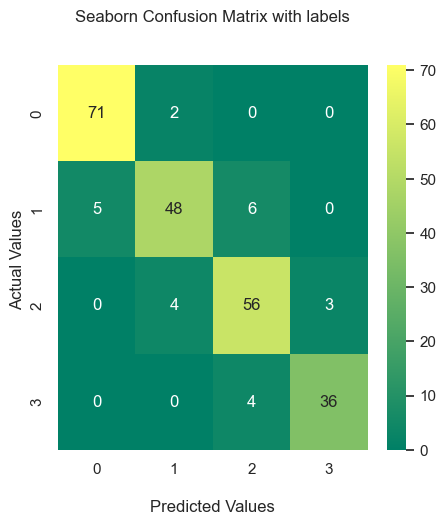

In [92]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='summer')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [93]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)


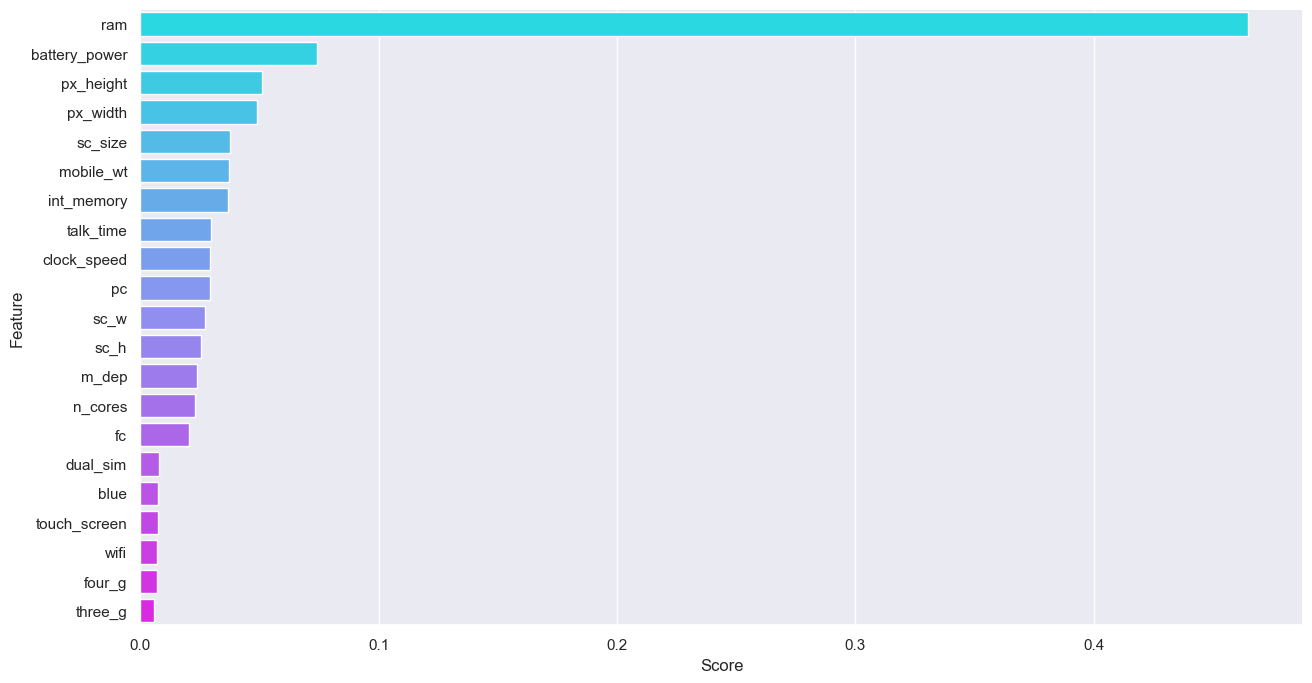

In [94]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'], palette="cool")
plt.show()

### **Now it is time for Hyperparameter tuning for Random Forest.**

In [95]:

params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [96]:
clsr.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 200}

In [97]:
clsr.best_estimator_

RandomForestClassifier(max_depth=20, max_leaf_nodes=40, min_samples_split=6,
                       n_estimators=200)

In [98]:
clsr.best_score_

0.8582442564539751

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [100]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8851063829787233

In [101]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.86      0.83      0.84        59
           2       0.85      0.81      0.83        63
           3       0.88      0.90      0.89        40

    accuracy                           0.89       235
   macro avg       0.88      0.88      0.88       235
weighted avg       0.88      0.89      0.88       235



[[72  1  0  0]
 [ 5 49  5  0]
 [ 0  7 51  5]
 [ 0  0  4 36]]


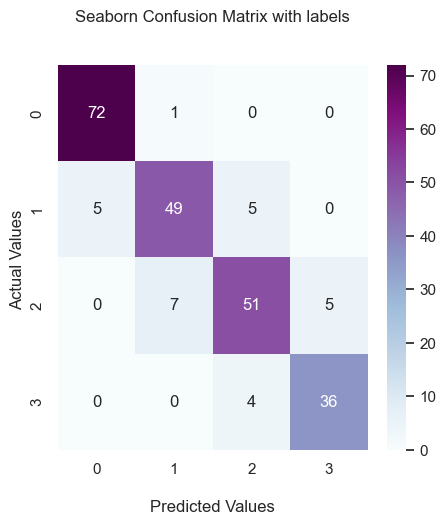

In [102]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     

In [103]:
y_pred = clsr.predict(X_train)
acc_rf= accuracy_score(y_train, y_pred)
print('Accuracy by random forest : ',acc_rf) ## calculating accurracy for random forest

Accuracy by random forest :  0.9722222222222222


In [104]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       264
           1       0.96      0.94      0.95       233
           2       0.98      0.97      0.97       218
           3       0.99      1.00      0.99       221

    accuracy                           0.97       936
   macro avg       0.97      0.97      0.97       936
weighted avg       0.97      0.97      0.97       936



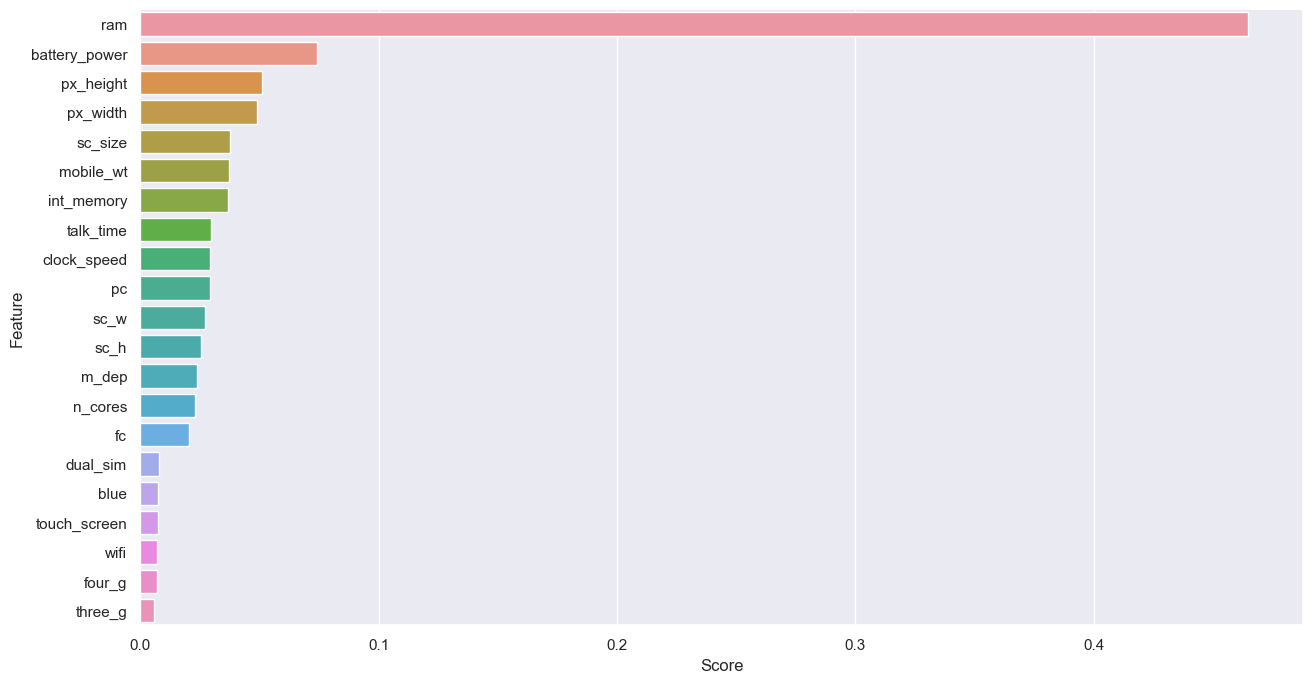

In [105]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

### Best Algorithm for Price Range Prediction

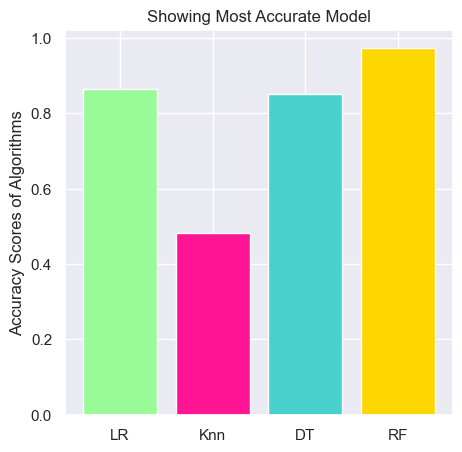

In [106]:
models = ['LR', 'Knn', 'DT', 'RF']
acc_scores = [lr_acc, acc_knn, dt_acc, acc_rf]

plt.bar(models, acc_scores, color=['palegreen', 'deeppink', 'mediumturquoise', 'gold'])
plt.ylabel("Accuracy Scores of Algorithms")
plt.title("Showing Most Accurate Model")
plt.show()

In [107]:
test_data = pd.read_csv("Dataset/test.csv") # reading test.csv file


In [108]:
test_data.head().T

,0,1,2,3,4
id,1.0,2.0,3.0,4.0,5.0
battery_power,1043.0,841.0,1807.0,1546.0,1434.0
blue,1.0,1.0,1.0,0.0,0.0
clock_speed,1.8,0.5,2.8,0.5,1.4
dual_sim,1.0,1.0,0.0,1.0,0.0
fc,14.0,4.0,1.0,18.0,11.0
four_g,0.0,1.0,0.0,1.0,1.0
int_memory,5.0,61.0,27.0,25.0,49.0
m_dep,0.1,0.8,0.9,0.5,0.5
mobile_wt,193.0,191.0,186.0,96.0,108.0


In [109]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.
test_data=test_data.drop('id',axis=1)


In [110]:
# Defining new variable sc_size

test_data['sc_size'] = np.sqrt((test_data['sc_h']**2) + (test_data['sc_w']**2))
test_data['sc_size'] = round(test_data['sc_size']/2.54, 2)

In [111]:
prediction = clsr.predict(test_data)

In [112]:
# We are able to forecast test dataset labels:
prediction

array([3, 3, 1, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 0, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 1, 1, 0, 1,
       1, 1, 3, 1, 2, 0, 3, 1, 1, 3, 2, 2, 2, 3, 3, 3, 1, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 1,
       1, 3, 1, 2, 3, 3, 3, 1, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 1, 1, 3, 0, 3, 0, 3, 1, 1, 0,
       0, 2, 1, 2, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 1, 2, 3, 2, 1, 1, 1, 0, 2, 3, 1,

In [113]:
test_data['price_range'] = prediction

In [114]:
test_data.head(5).T

,0,1,2,3,4
battery_power,1043.00,841.00,1807.00,1546.00,1434.00
blue,1.00,1.00,1.00,0.00,0.00
clock_speed,1.80,0.50,2.80,0.50,1.40
dual_sim,1.00,1.00,0.00,1.00,0.00
fc,14.00,4.00,1.00,18.00,11.00
four_g,0.00,1.00,0.00,1.00,1.00
int_memory,5.00,61.00,27.00,25.00,49.00
m_dep,0.10,0.80,0.90,0.50,0.50
mobile_wt,193.00,191.00,186.00,96.00,108.00
n_cores,3.00,5.00,3.00,8.00,6.00


In [115]:
ds.head(5).T

,0,1,6,7,8
battery_power,842.00,1021.0,1821.00,1954.00,1445.0
blue,0.00,1.0,0.00,0.00,1.0
clock_speed,2.20,0.5,1.70,0.50,0.5
dual_sim,0.00,1.0,0.00,1.00,0.0
fc,1.00,0.0,4.00,0.00,0.0
four_g,0.00,1.0,1.00,0.00,0.0
int_memory,7.00,53.0,10.00,24.00,53.0
m_dep,0.60,0.7,0.80,0.80,0.7
mobile_wt,188.00,136.0,139.00,187.00,174.0
n_cores,2.00,3.0,8.00,4.00,7.0


In [116]:
ds[ds['sc_size']==6]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
202,1087,0,1.3,0,0,1,16,0.3,166,3,...,589,690,14,6,6,1,0,1,0,6.0
559,1191,0,2.4,1,2,0,13,0.9,169,1,...,1813,1028,14,6,8,1,1,1,0,6.0
698,1940,1,0.9,1,4,0,17,0.7,93,5,...,858,2297,14,6,8,0,1,0,2,6.0


In [117]:
test_data[test_data['n_cores']== 8]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_size,price_range
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,3.94,3
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,939,3506,10,7,3,1,1,1,4.81,3
14,630,0,1.8,0,8,1,51,0.9,193,8,...,1323,2751,17,6,3,1,1,0,7.10,2
15,1846,1,1.0,0,5,1,53,0.7,106,8,...,1832,563,9,5,10,1,0,1,4.05,0
30,1981,0,2.9,1,2,1,11,0.3,184,8,...,1408,2383,11,2,18,1,0,0,4.40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,700,1,1.3,0,2,0,40,0.1,150,8,...,1325,2537,15,10,8,1,1,1,7.10,2
968,1637,1,0.6,1,12,1,57,0.5,111,8,...,940,3329,11,9,6,1,1,0,5.60,3
976,958,0,0.5,1,0,1,47,0.7,116,8,...,501,1706,6,2,2,1,1,0,2.49,1
977,1882,1,2.1,1,0,0,17,0.1,127,8,...,1171,2996,9,6,3,1,0,0,4.26,3
